<a href="https://colab.research.google.com/github/jlborrego/Employee-Attrition/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación librerías y dataset

In [ ]:

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from collections import Counter
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings('ignore')


datos = pd.read_csv("https://raw.githubusercontent.com/jlborrego/Employee-Attrition/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None) #Para que nos muestre todas las columnas
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

# Primer vistazo a los datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Podemos ver que no hay valores nulos 👍

In [ ]:
datos.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Las columnas de EmployeeCount, EmployeeNumber, Over18, StandardHours no nos aportan ninguna información al tratarse de IDs, conteos o columnas con solo 1 valor único.
Por lo tanto descartamos estos datos.

In [ ]:
datos.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],axis="columns", inplace=True)
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [ ]:
res_attrition = datos.groupby('Attrition')
res_attrition.mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
Attrition                                                                     
No                2.778589    6832.739659  14265.779400            2.645580   
Yes               2.468354    4787.092827  14559.308017            2.940928   

           PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
Attrition                                                                   
No                 15.231144           3.153285                  2.733982   
Yes                15.097046           3.156118                  2.599156   

           StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition                                                               
No                 0.845093          11.862936               2.832928   
Yes                0.527426           8.244726               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
No                2.781022        7.369019            4.484185   
Yes               2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                 
No                        2.234388              4.367397  
Yes                       1.945148              2.852321

No     1233
Yes     237
Name: Attrition, dtype: int64


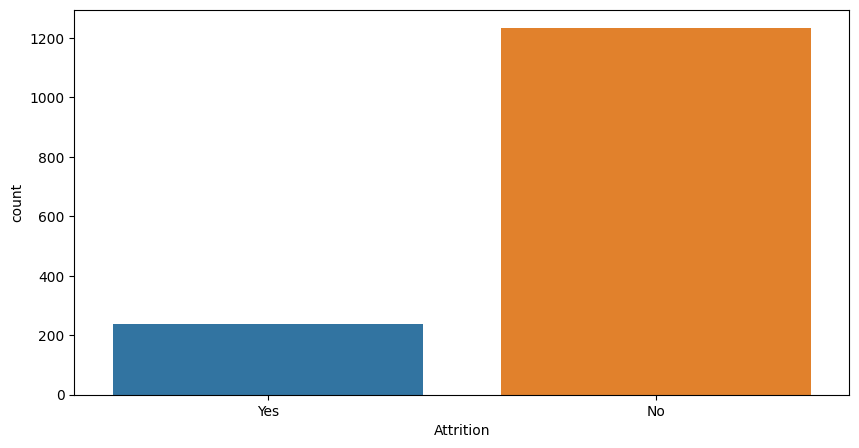

In [ ]:
print(datos['Attrition'].value_counts())
plt.subplots(figsize=(10,5))
sns.countplot(data=datos, x='Attrition')
plt.show()


 1233 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron

In [ ]:
cat_vars = [var for var in datos.columns if datos[var].dtype == 'O']
print('Num de var categóricas:')
print(len(cat_vars))
num_vars = [var for var in datos.columns if var not in cat_vars ]
print('Num de var numéricas:')
print(len(num_vars))


Num de var categóricas:
8
Num de var numéricas:
23


In [ ]:
datos[cat_vars]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus OverTime  
0     Female            Sales Executive        Single      Yes  
1       Male         Research Scientist       Married       No  
2       Male      Laboratory Technician        Single      Yes  
3     Female         Research Scientist       Married      Yes  
4       Male      Laboratory Technician       Married       No  
...      ...                        ...           ...      ...  
1465    Male      Laboratory Technician       Married       No  
1466    Male  Healthcare Representative       Married       No  
1467    Male     Manufacturing Director       Married      Yes  
1468    Male            Sales Executive       Married       No  
1469    Male      Laboratory Technician       Married       No  

[1470 rows x 8 columns]

In [ ]:
datos[num_vars]

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0           19479                   8                 11                  3   
1           24907                   1                 23                  4   
2            2396                   6                 15                  3   
3           23159                   1                 11                  3   
4           16632                   9                 12                  3   
...           ...                 ...                ...                ...   
1465        12290                   4                 17                  3   
1466        21457                   4                 15                  3   
1467         5174                   1                 20                  4   
1468        13243                   2                 14                  3   
1469        10228                   2                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4         

# Resumen de datos

En un primer vistazo hemos podido ver varias cosas:

*   Estructura del conjunto de datos: 1470 observaciones (filas), 35 características (variables)

*   Datos que faltan: Por suerte no faltan datos, lo que facilitará el trabajo con el conjunto de datos.

*   Tipos de datos: En este conjunto de datos sólo tenemos dos tipos de datos: 8 categóricos y 23 enteros.

*   Target: 'Attrition' es el objetivo de nuestro conjunto de datos.

*   Conjunto de datos desbalanceado: 1237 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron, lo que hace que nuestro conjunto de datos se considere desequilibrado, ya que hay más personas que permanecen en la organización de las que realmente la abandonan.







# Gráficas generales

In [ ]:
ncols = 2
nrows = np.ceil(len(datos.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(datos.columns, axs.flatten()):
    sns.histplot(datos, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('gráfica_OverView.pdf', dpi=fig.dpi)

In [ ]:
datos.hist(figsize=(20,15))
plt.show() 


# Gráficas de varibles Catégoricas

## Género (Gender)

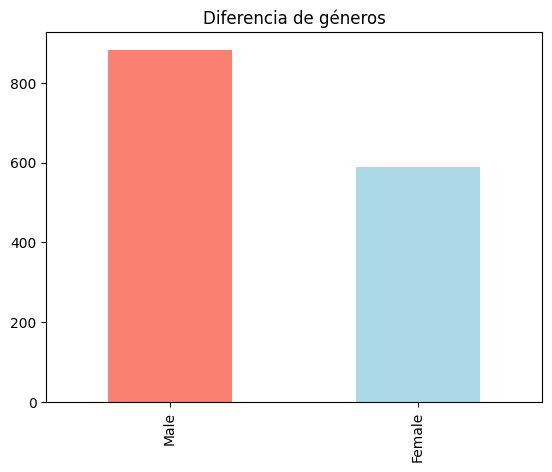

In [ ]:
datos['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Diferencia de géneros")
plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

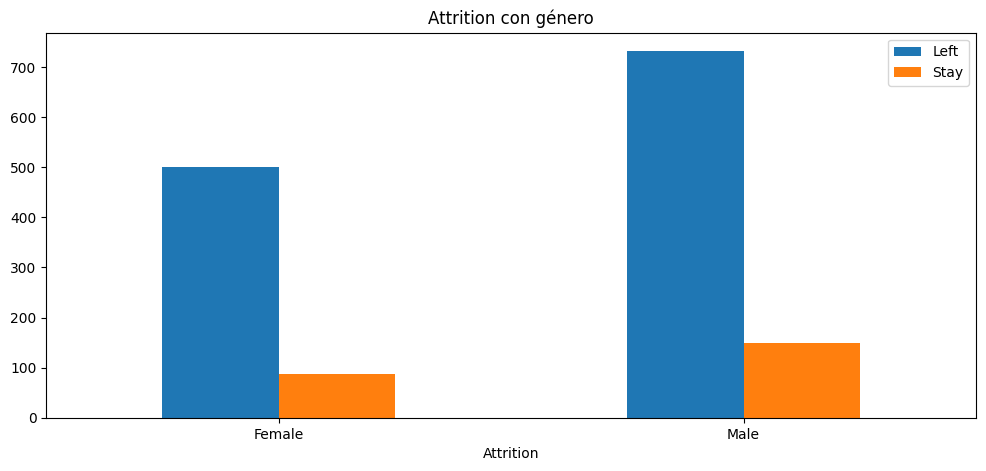

In [ ]:
pd.crosstab(datos['Gender'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con género")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Horas extra (Overtime)

In [ ]:
datos['OverTime'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Horas extra")

<Axes: title={'center': 'Horas extra'}>

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

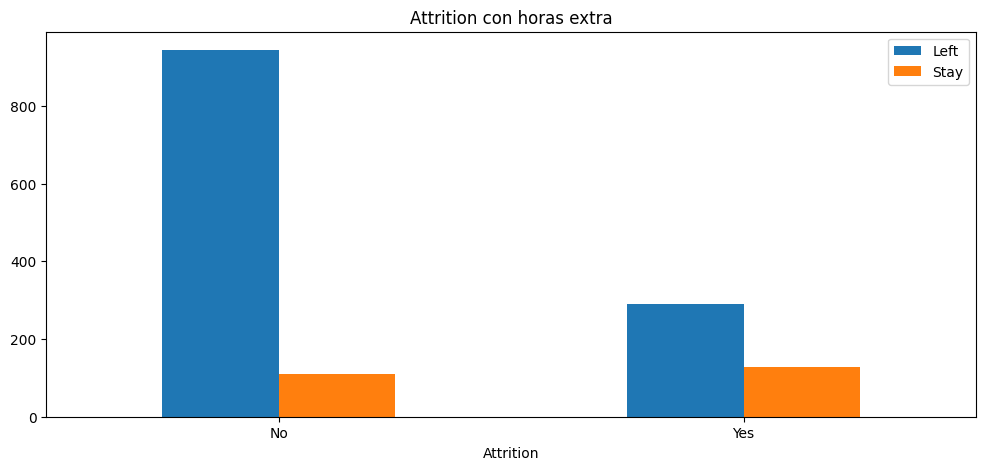

In [ ]:
pd.crosstab(datos['OverTime'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con horas extra")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Viajar (BusinessTravel)

In [ ]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

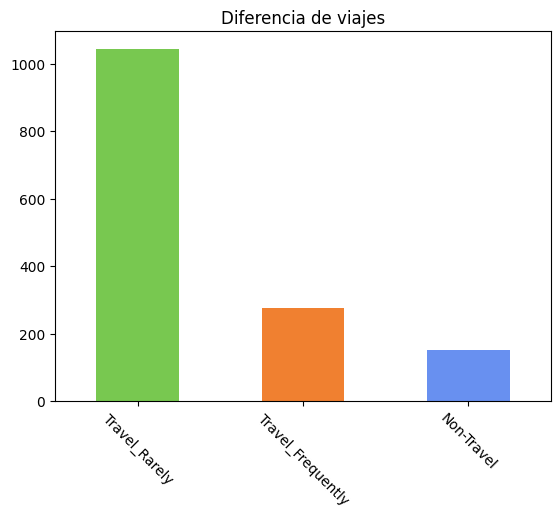

In [ ]:
datos['BusinessTravel'].value_counts().plot(kind='bar',color=color_types,title="Diferencia de viajes")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

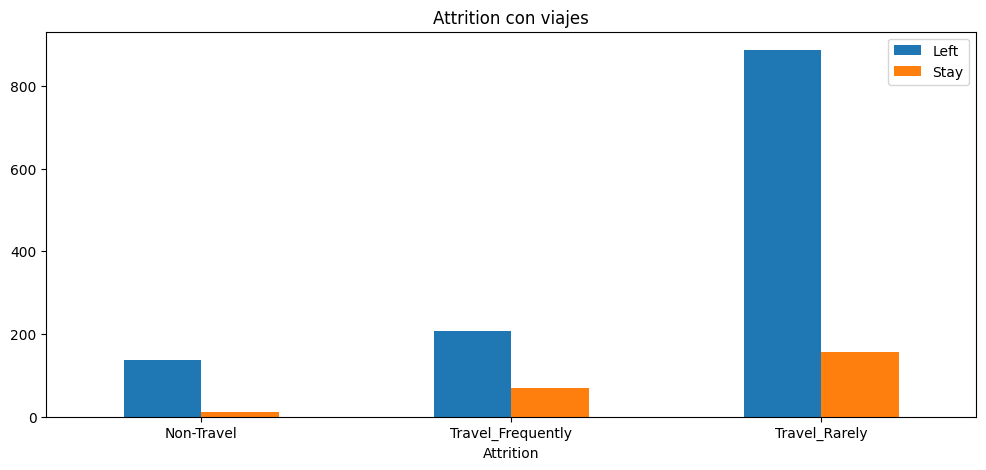

In [ ]:
pd.crosstab(datos['BusinessTravel'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con viajes")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Departamento (Department)

(array([0, 1, 2]),
 [Text(0, 0, 'Research & Development'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources')])

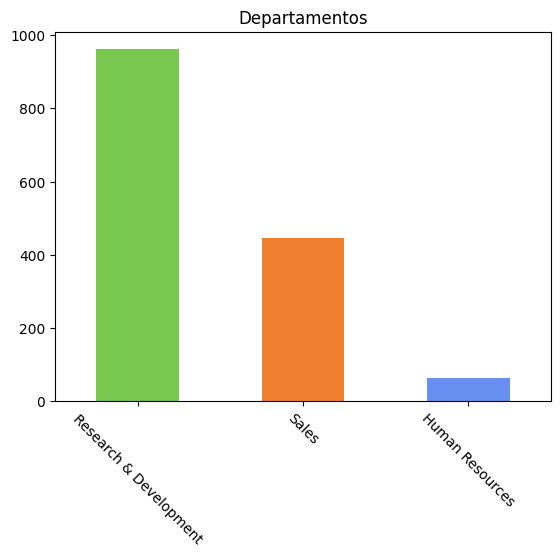

In [ ]:
datos['Department'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

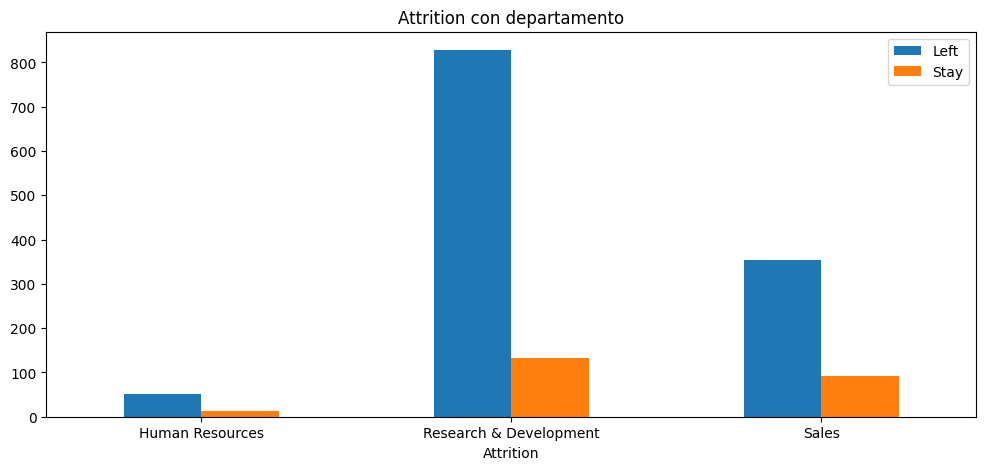

In [ ]:
pd.crosstab(datos['Department'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con departamento")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## 

## Tipo de estudios (EducationField)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Medical'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Technical Degree'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Human Resources')])

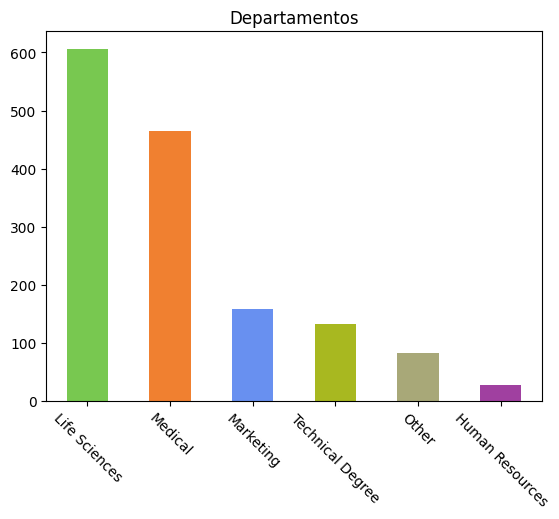

In [ ]:
datos['EducationField'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

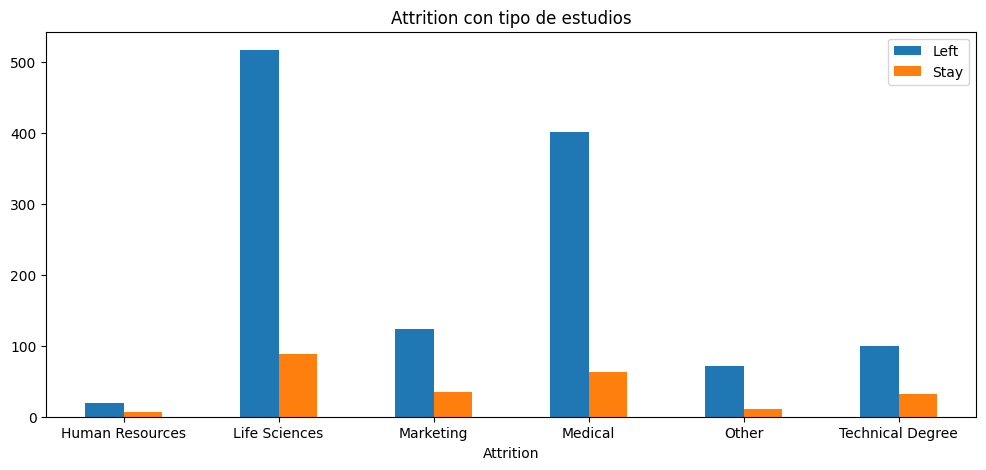

In [ ]:
pd.crosstab(datos['EducationField'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con tipo de estudios")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Rol de trabajo (JobRole)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

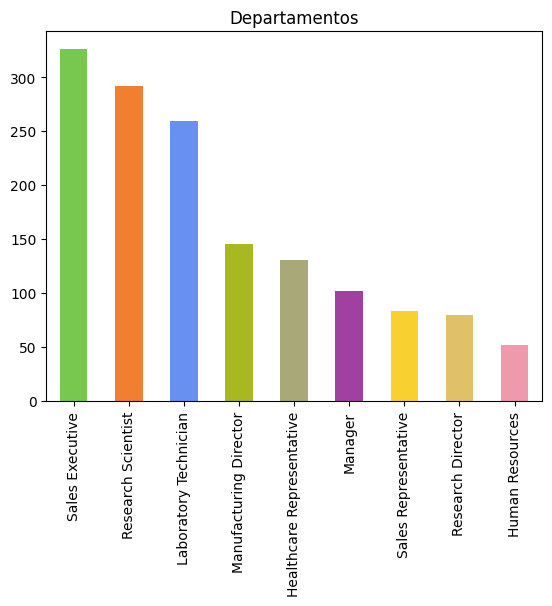

In [ ]:
datos['JobRole'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

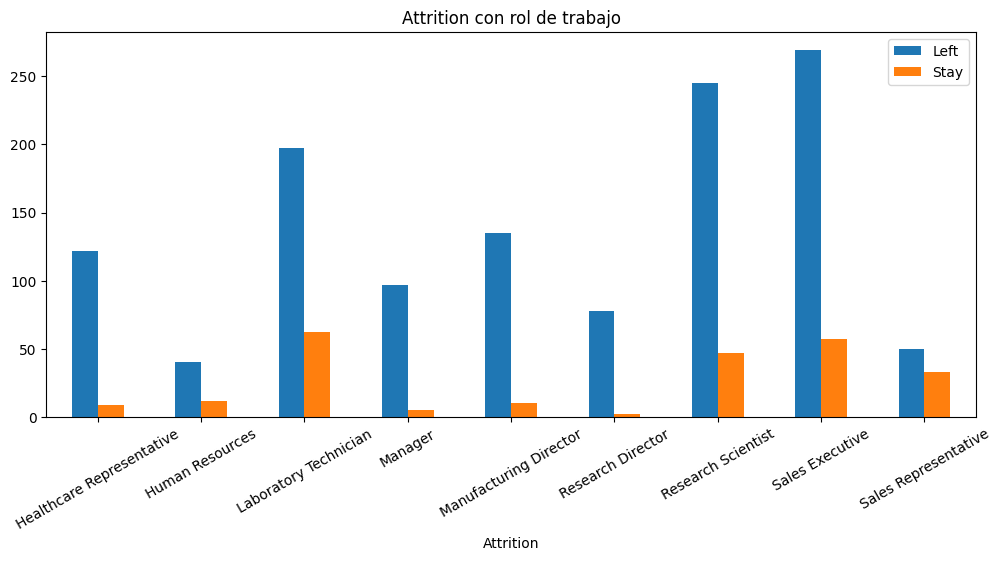

In [ ]:
pd.crosstab(datos['JobRole'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con rol de trabajo")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=30)


## Estado civil (MaritalStatus)

<Axes: title={'center': 'Departamentos'}>

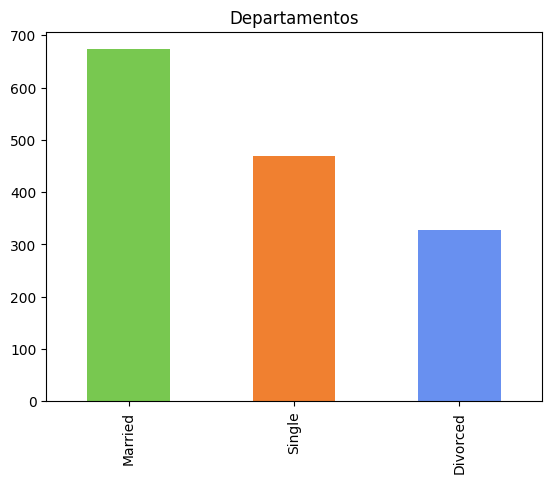

In [ ]:
datos['MaritalStatus'].value_counts().plot(kind='bar',color=color_types ,title="Departamentos")

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

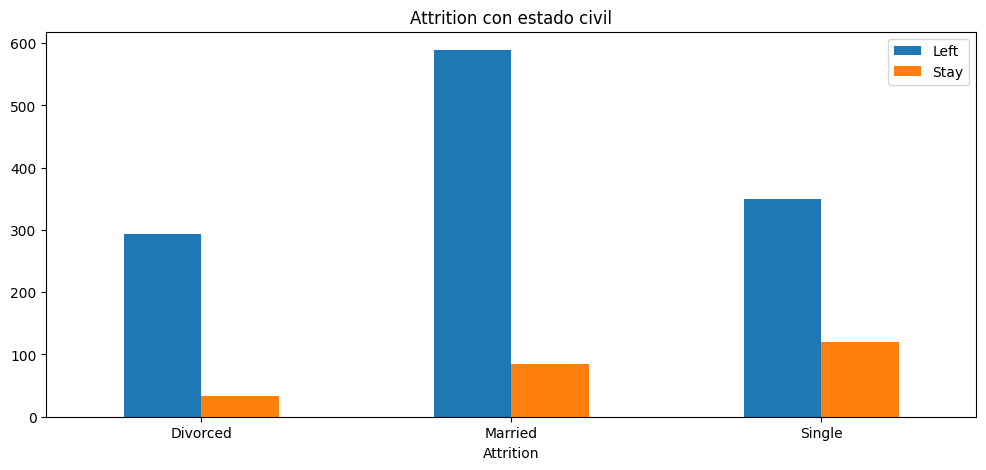

In [ ]:
pd.crosstab(datos['MaritalStatus'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con estado civil")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

# **Gráficas de variables númericas**

## Edad (Age)

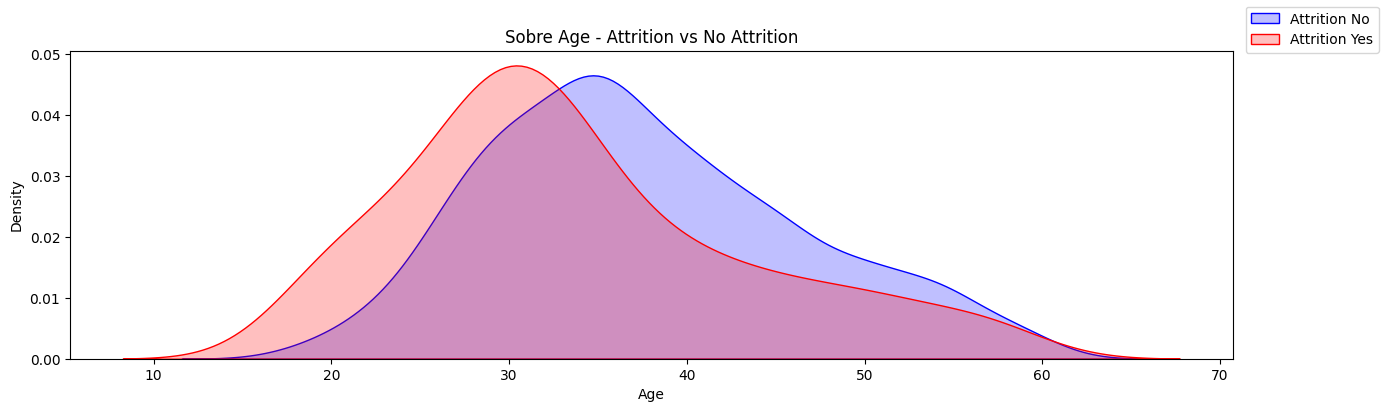

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Age'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Age'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Age - Attrition vs No Attrition')
plt.show()
fig.savefig('gráfica_Age.pdf')
#sns_plot.figure.savefig("output.png")
#plt.savefig('gráfica_Age.pdf')

## Tasa diaria (DailyRate)

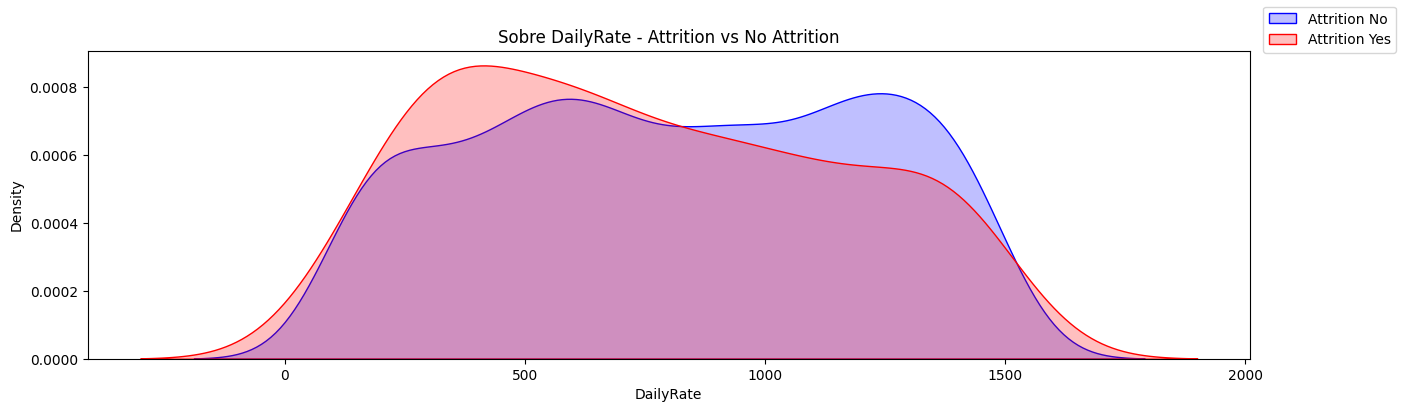

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'DailyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'DailyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre DailyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_DailyRate.pdf', dpi=fig.dpi)

## Distancia desde casa (DistanceFromHome)

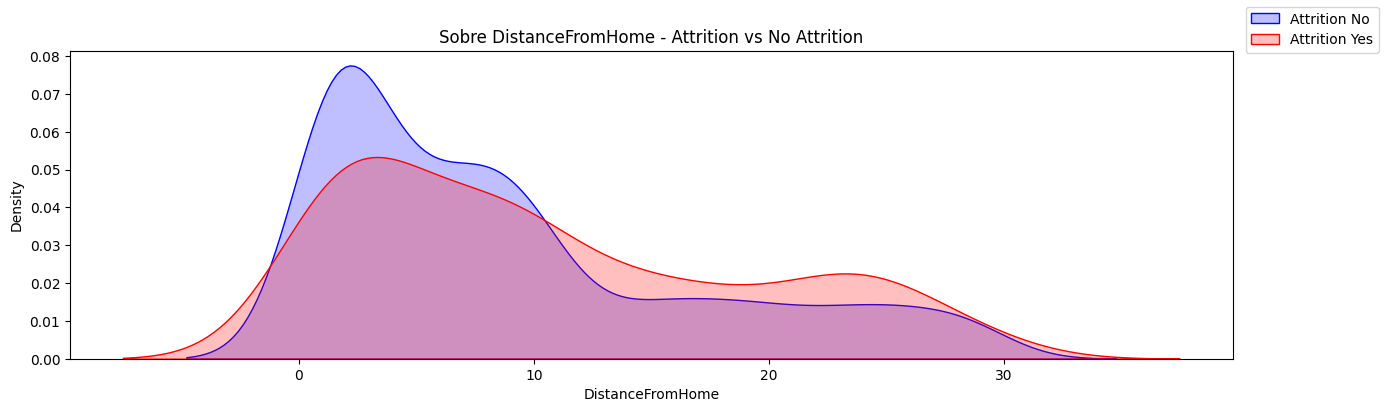

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'DistanceFromHome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre DistanceFromHome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_DistanceFromHome.pdf', dpi=fig.dpi)

## Educación (Education)

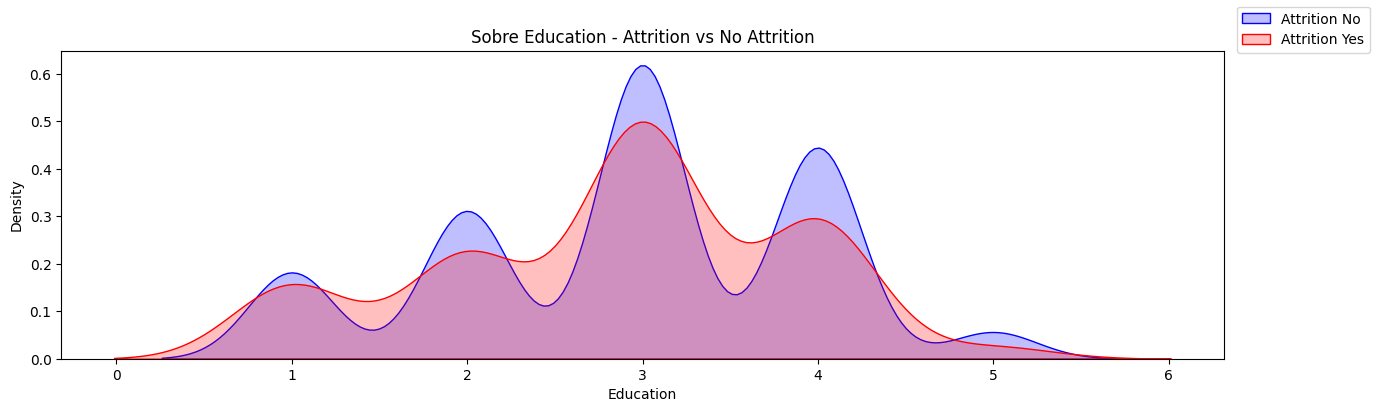

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Education'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Education'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Education - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_Education.pdf', dpi=fig.dpi)

## Satisfacción con el entorno (EnvironmentSatisfaction)

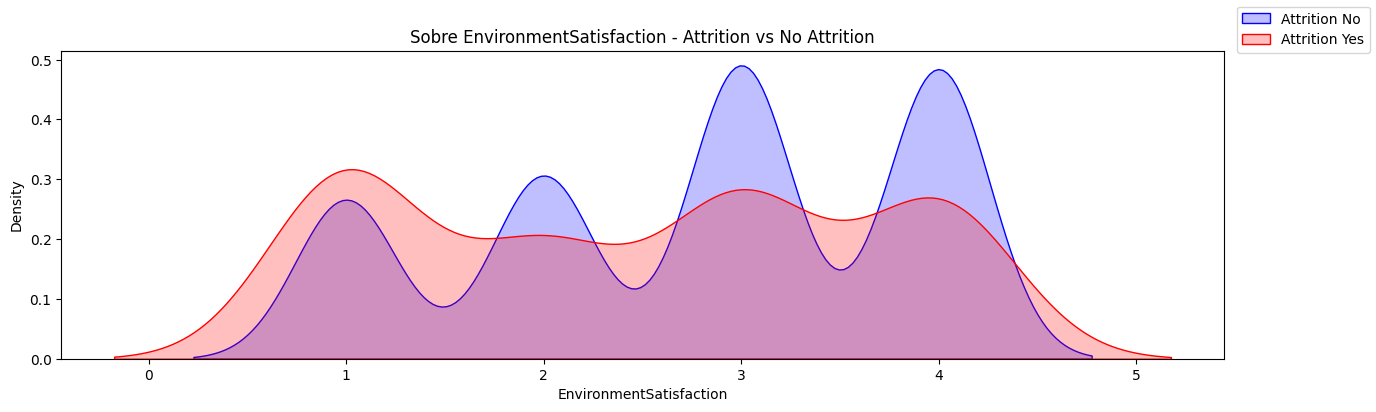

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'EnvironmentSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'EnvironmentSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre EnvironmentSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_EnvironmentSatisfaction.pdf', dpi=fig.dpi)

## Tasa por hora de trabajo (HourlyRate)

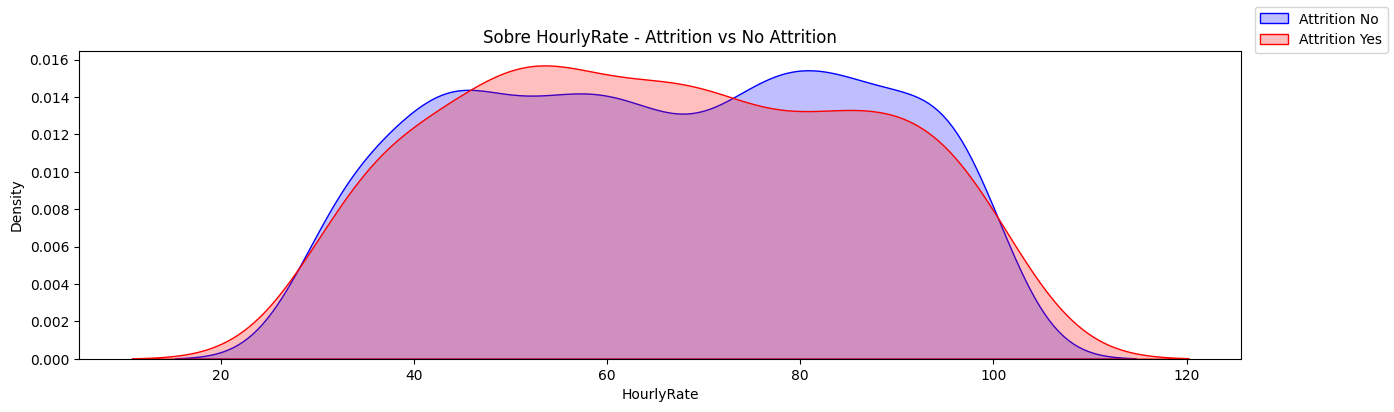

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'HourlyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'HourlyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre HourlyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_HourlyRate.pdf', dpi=fig.dpi)

## Implicación en el trabajo (JobInvolvement)

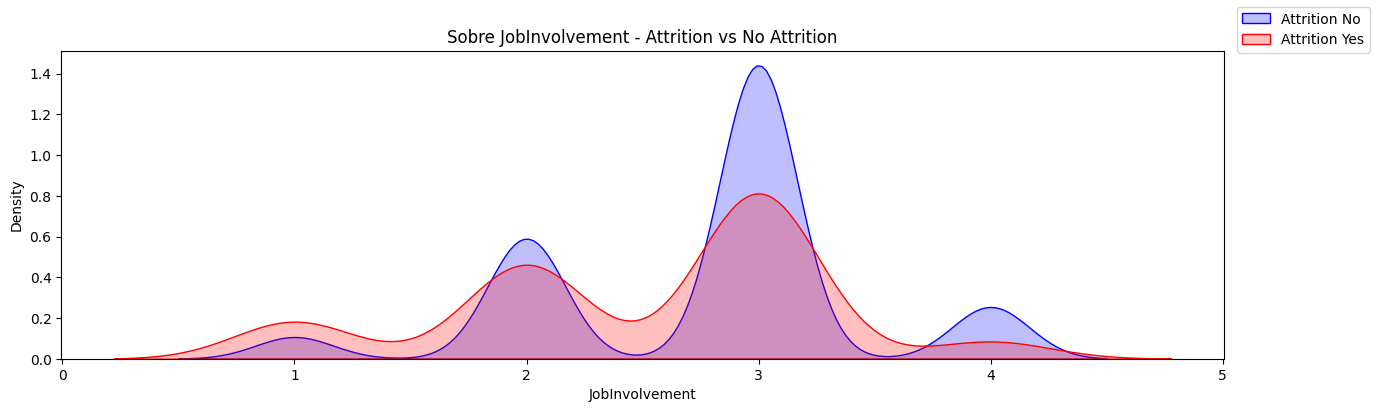

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobInvolvement'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobInvolvement'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobInvolvement - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobInvolvement.pdf', dpi=fig.dpi)

## Nivel de trabajo (JobLevel)

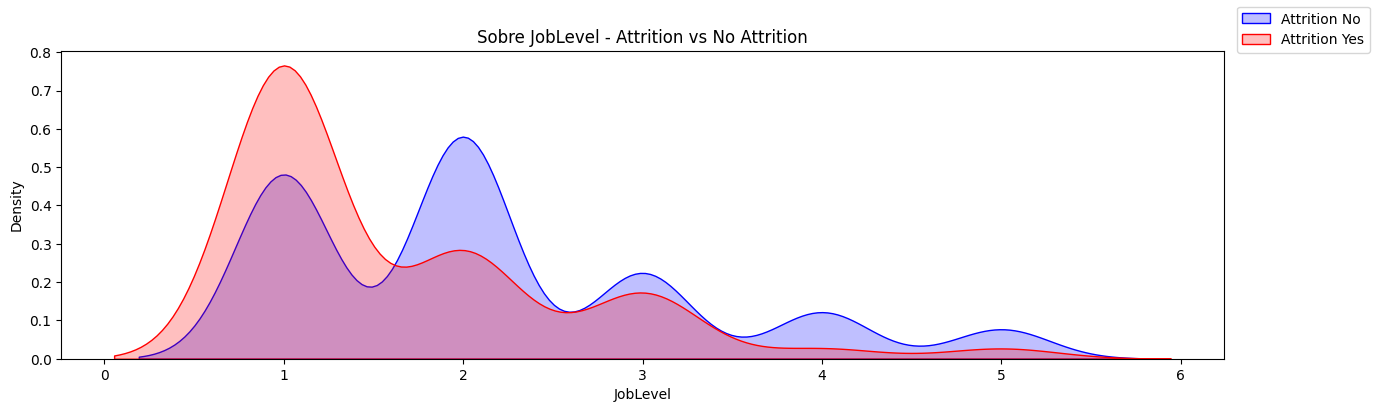

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobLevel.pdf', dpi=fig.dpi)

## Satisfacción con el trabajo (JobSatisfaction)

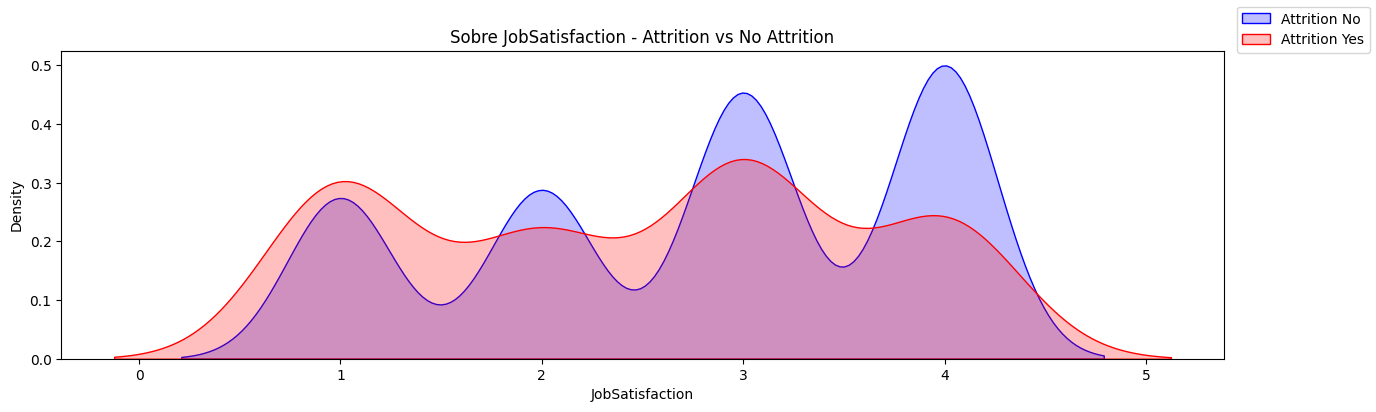

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobSatisfaction.pdf', dpi=fig.dpi)

##  Ingreso mensual (MonthlyIncome)

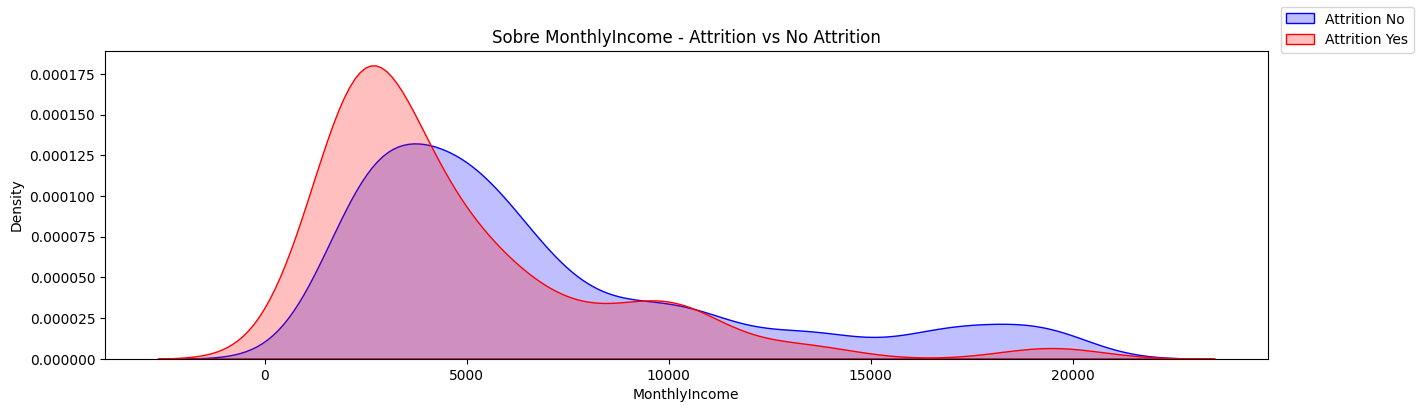

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'MonthlyIncome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'MonthlyIncome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre MonthlyIncome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_MonthlyIncome.pdf', dpi=fig.dpi)

##  Tasa mensual de pago (MonthlyRate)

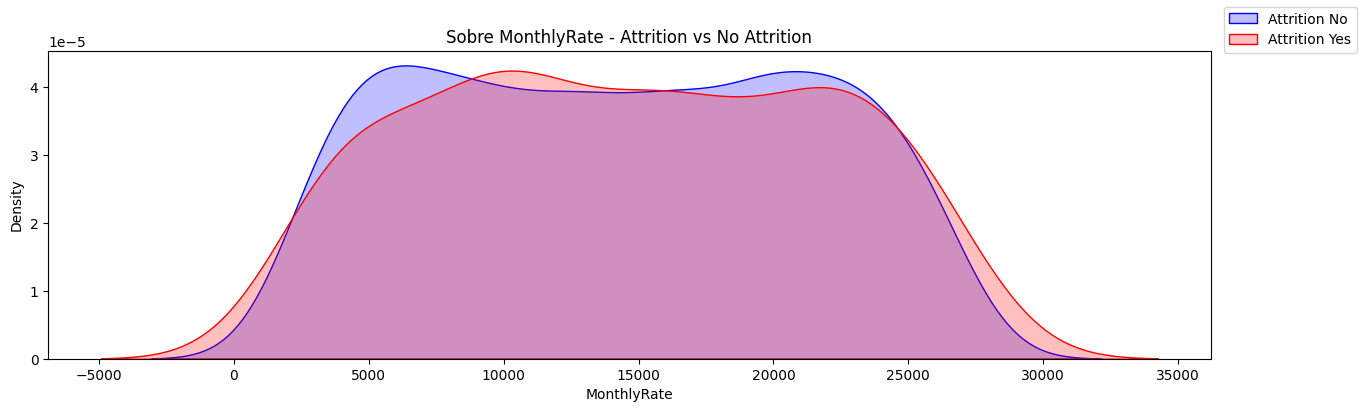

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'MonthlyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'MonthlyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre MonthlyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_MonthlyRate.pdf', dpi=fig.dpi)

## Número de compañías en las que ha trabajado (NumCompaniesWorked)

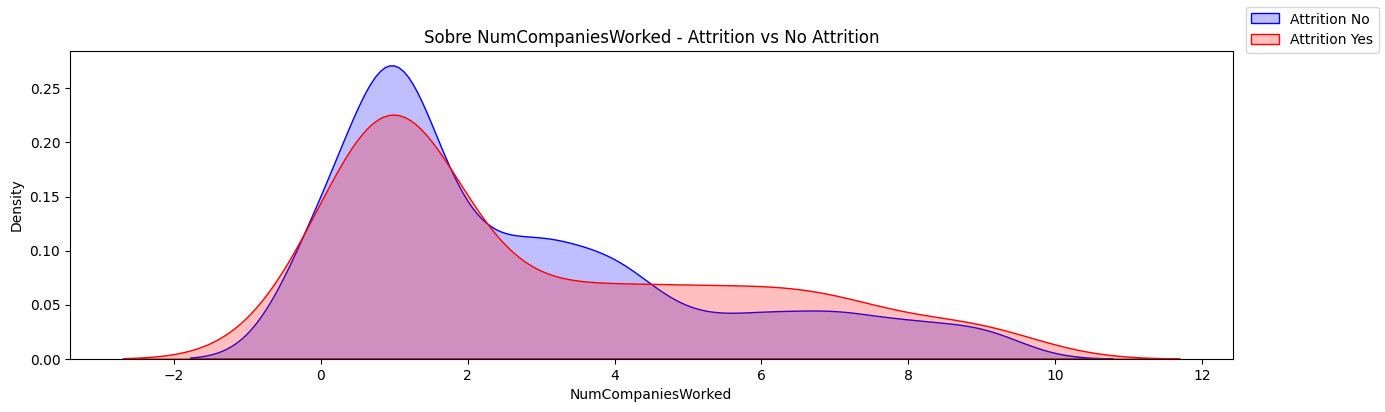

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'NumCompaniesWorked'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'NumCompaniesWorked'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre NumCompaniesWorked - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_NumCompaniesWorked.pdf', dpi=fig.dpi)

## Porcentaje de aumento salarial (PercentSalaryHike)

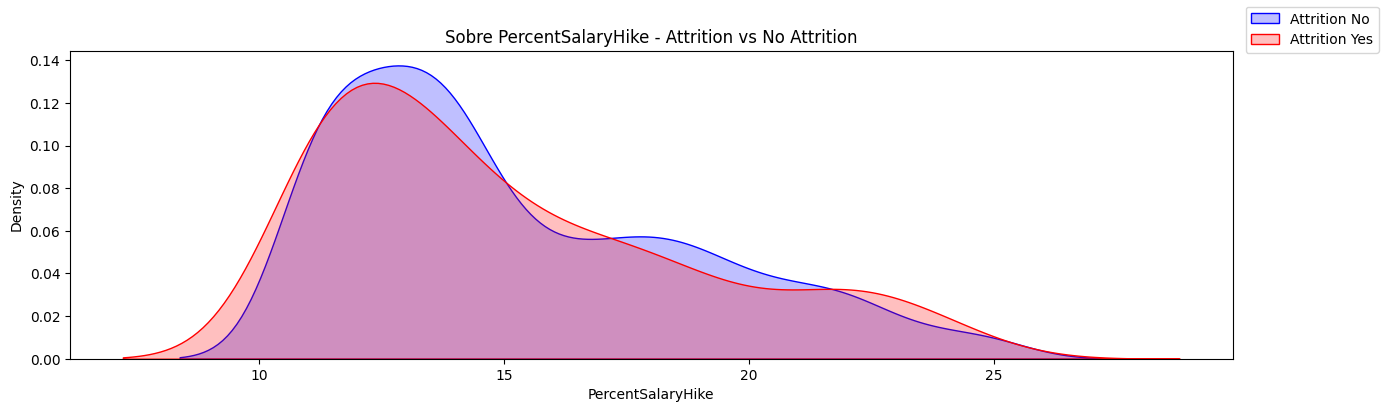

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PercentSalaryHike'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PercentSalaryHike'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PercentSalaryHike - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PercentSalaryHike.pdf', dpi=fig.dpi)

## Calificación de desempeño del empleado (PerformanceRating)

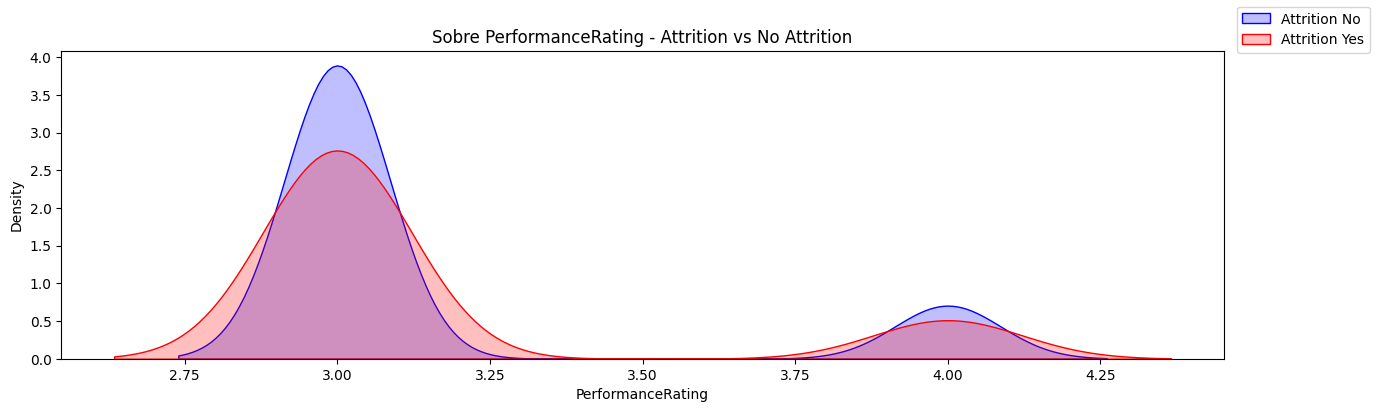

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PerformanceRating'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PerformanceRating'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PerformanceRating - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PerformanceRating.pdf', dpi=fig.dpi)

## Satisfacción de la relación (RelationshipSatisfaction)

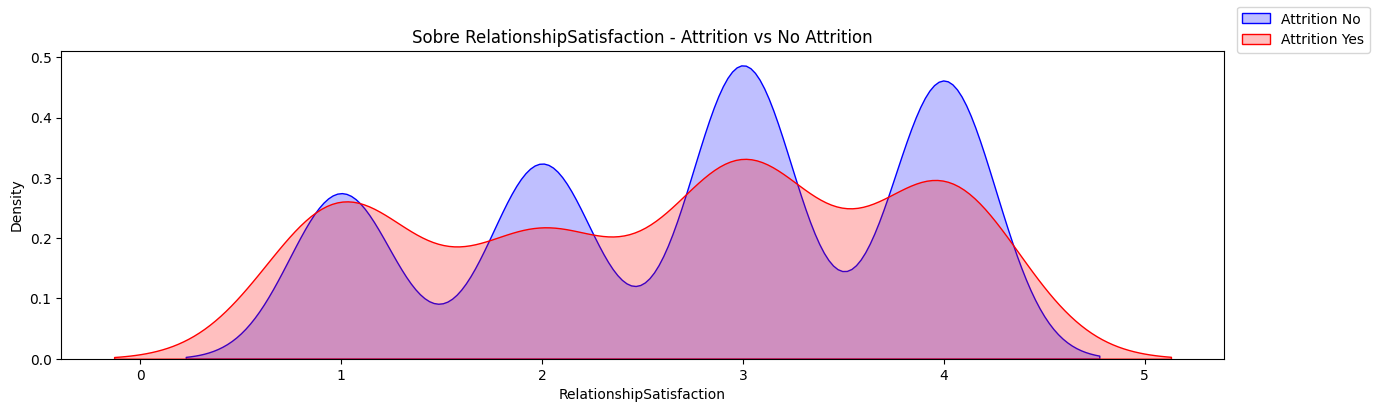

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'RelationshipSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'RelationshipSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre RelationshipSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_RelationshipSatisfaction.pdf', dpi=fig.dpi)

## Nivel de opciones sobre acciones que se han otorgado al empleado(StockOptionLevel)

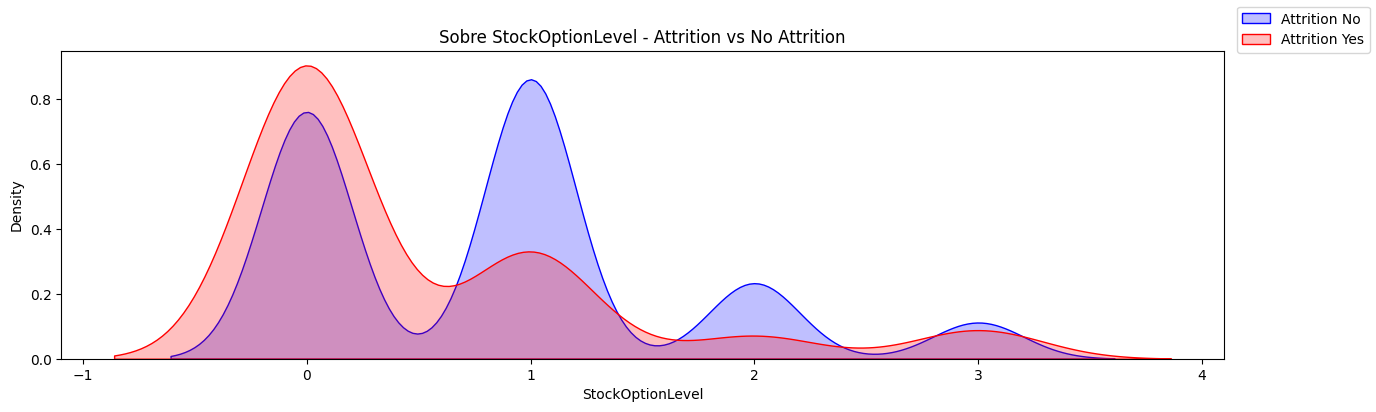

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'StockOptionLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'StockOptionLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre StockOptionLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_StockOptionLevel.pdf', dpi=fig.dpi)

## Número total de años trabajados (TotalWorkingYears)

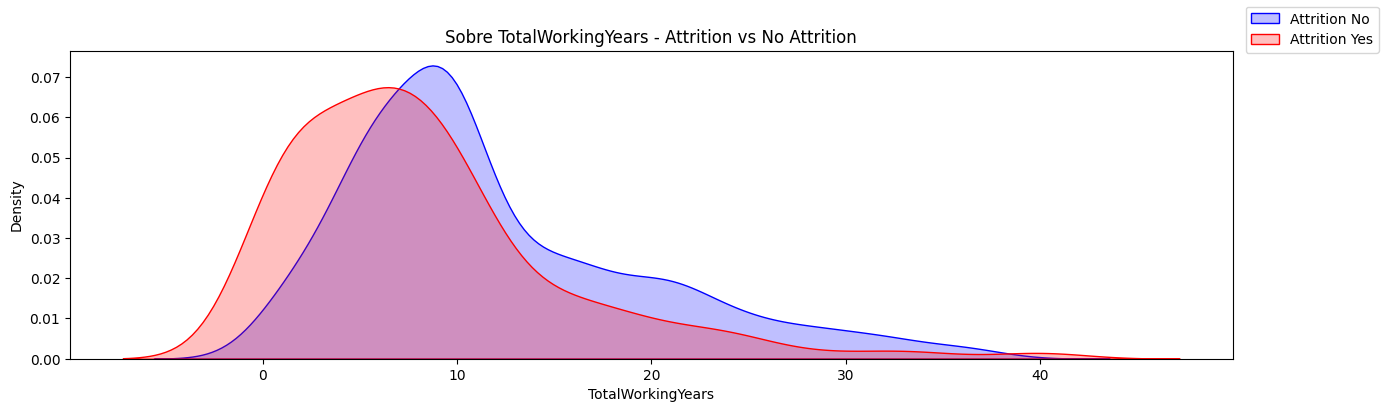

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TotalWorkingYears'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TotalWorkingYears'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TotalWorkingYears - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TotalWorkingYears.pdf', dpi=fig.dpi)

## Número de veces que el empleado ha recibido formación en el último año(TrainingTimesLastYear)

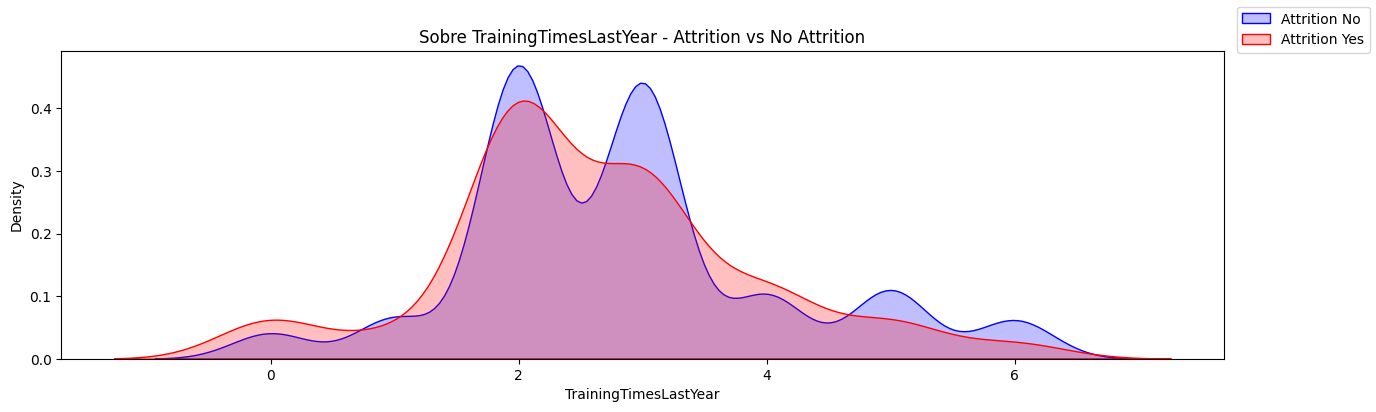

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TrainingTimesLastYear'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TrainingTimesLastYear'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TrainingTimesLastYear - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TrainingTimesLastYear.pdf', dpi=fig.dpi)

## Equilibrio entre trabajo y vida personal (WorkLifeBalance)

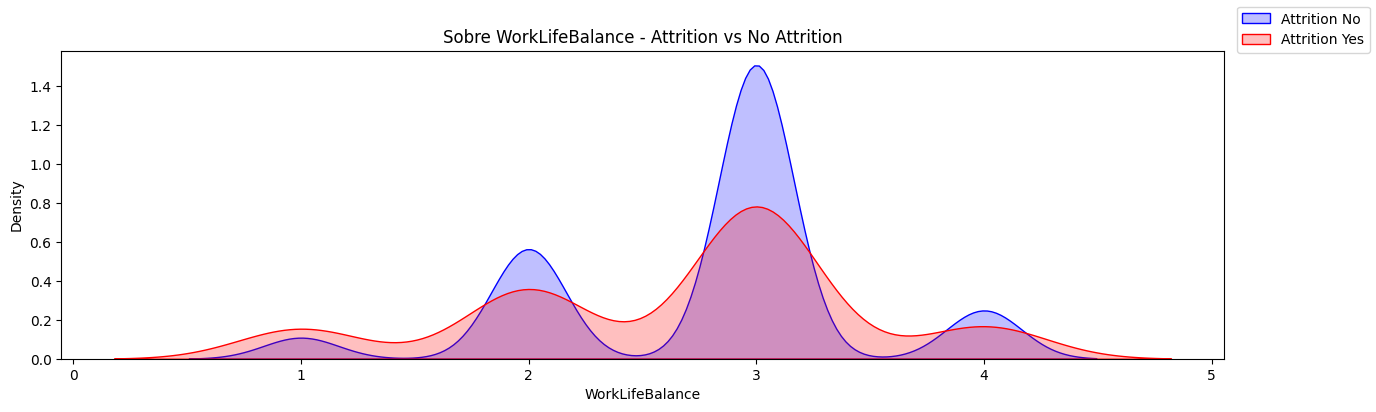

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'WorkLifeBalance'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'WorkLifeBalance'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre WorkLifeBalance - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_WorkLifeBalance.pdf', dpi=fig.dpi)

## Años en la compañía (YearsAtCompany)

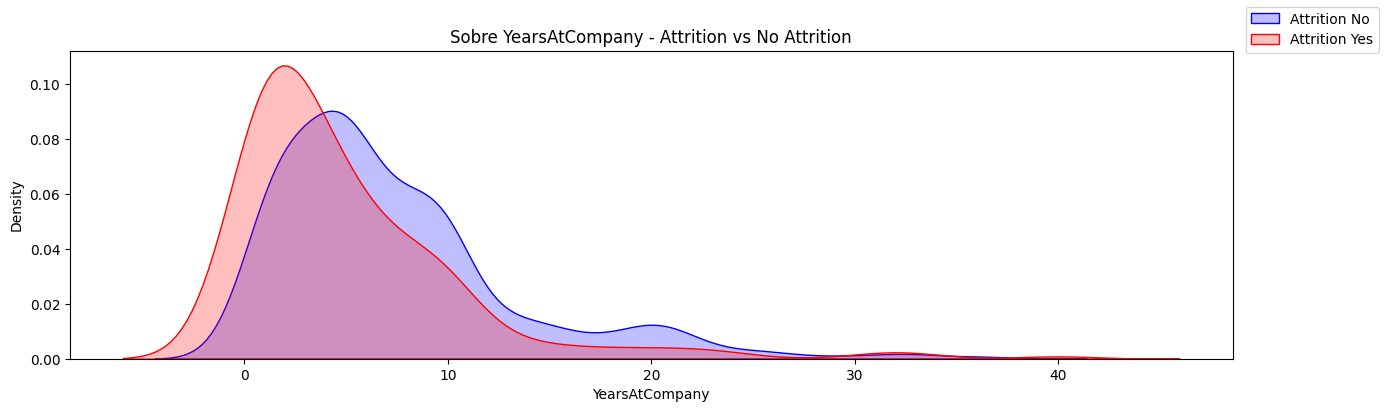

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsAtCompany'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsAtCompany'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsAtCompany - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsAtCompany.pdf', dpi=fig.dpi)

## Años en rol actual (YearsInCurrentRole)

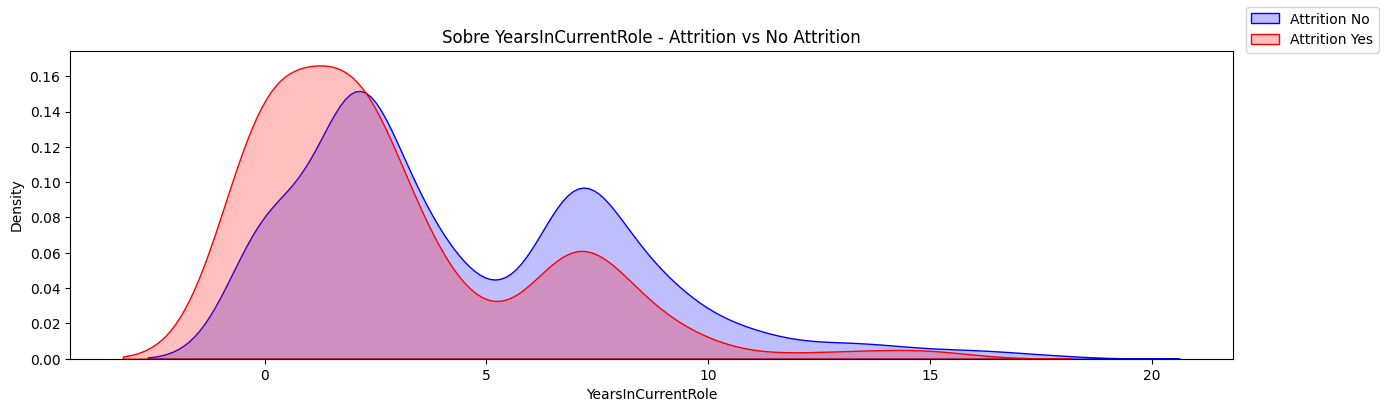

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsInCurrentRole'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsInCurrentRole'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsInCurrentRole - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsInCurrentRole.pdf', dpi=fig.dpi)

## Años desde el último ascenso (YearsSinceLastPromotion)

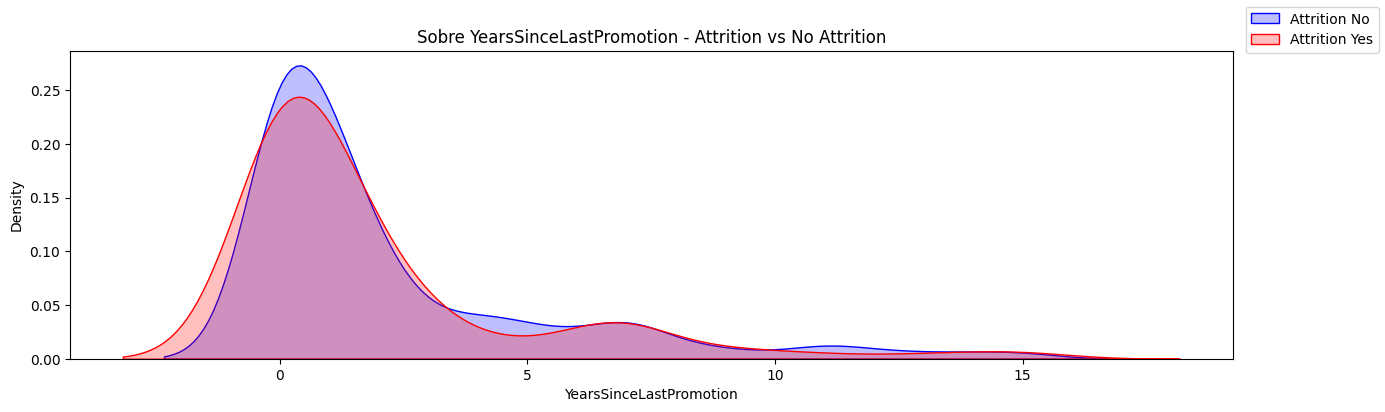

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsSinceLastPromotion'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsSinceLastPromotion'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsSinceLastPromotion - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsSinceLastPromotion.pdf', dpi=fig.dpi)

## Años con el actual jefe (YearsWithCurrManager)

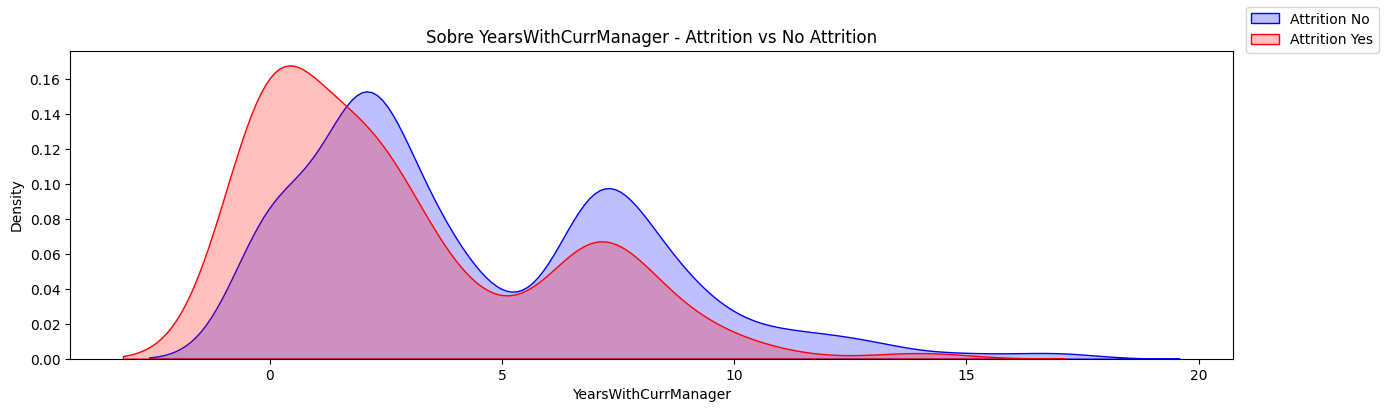

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsWithCurrManager'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsWithCurrManager'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsWithCurrManager - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsWithCurrManager.pdf', dpi=fig.dpi)

# Preprocesamiento de datos

# Mapa de correlación

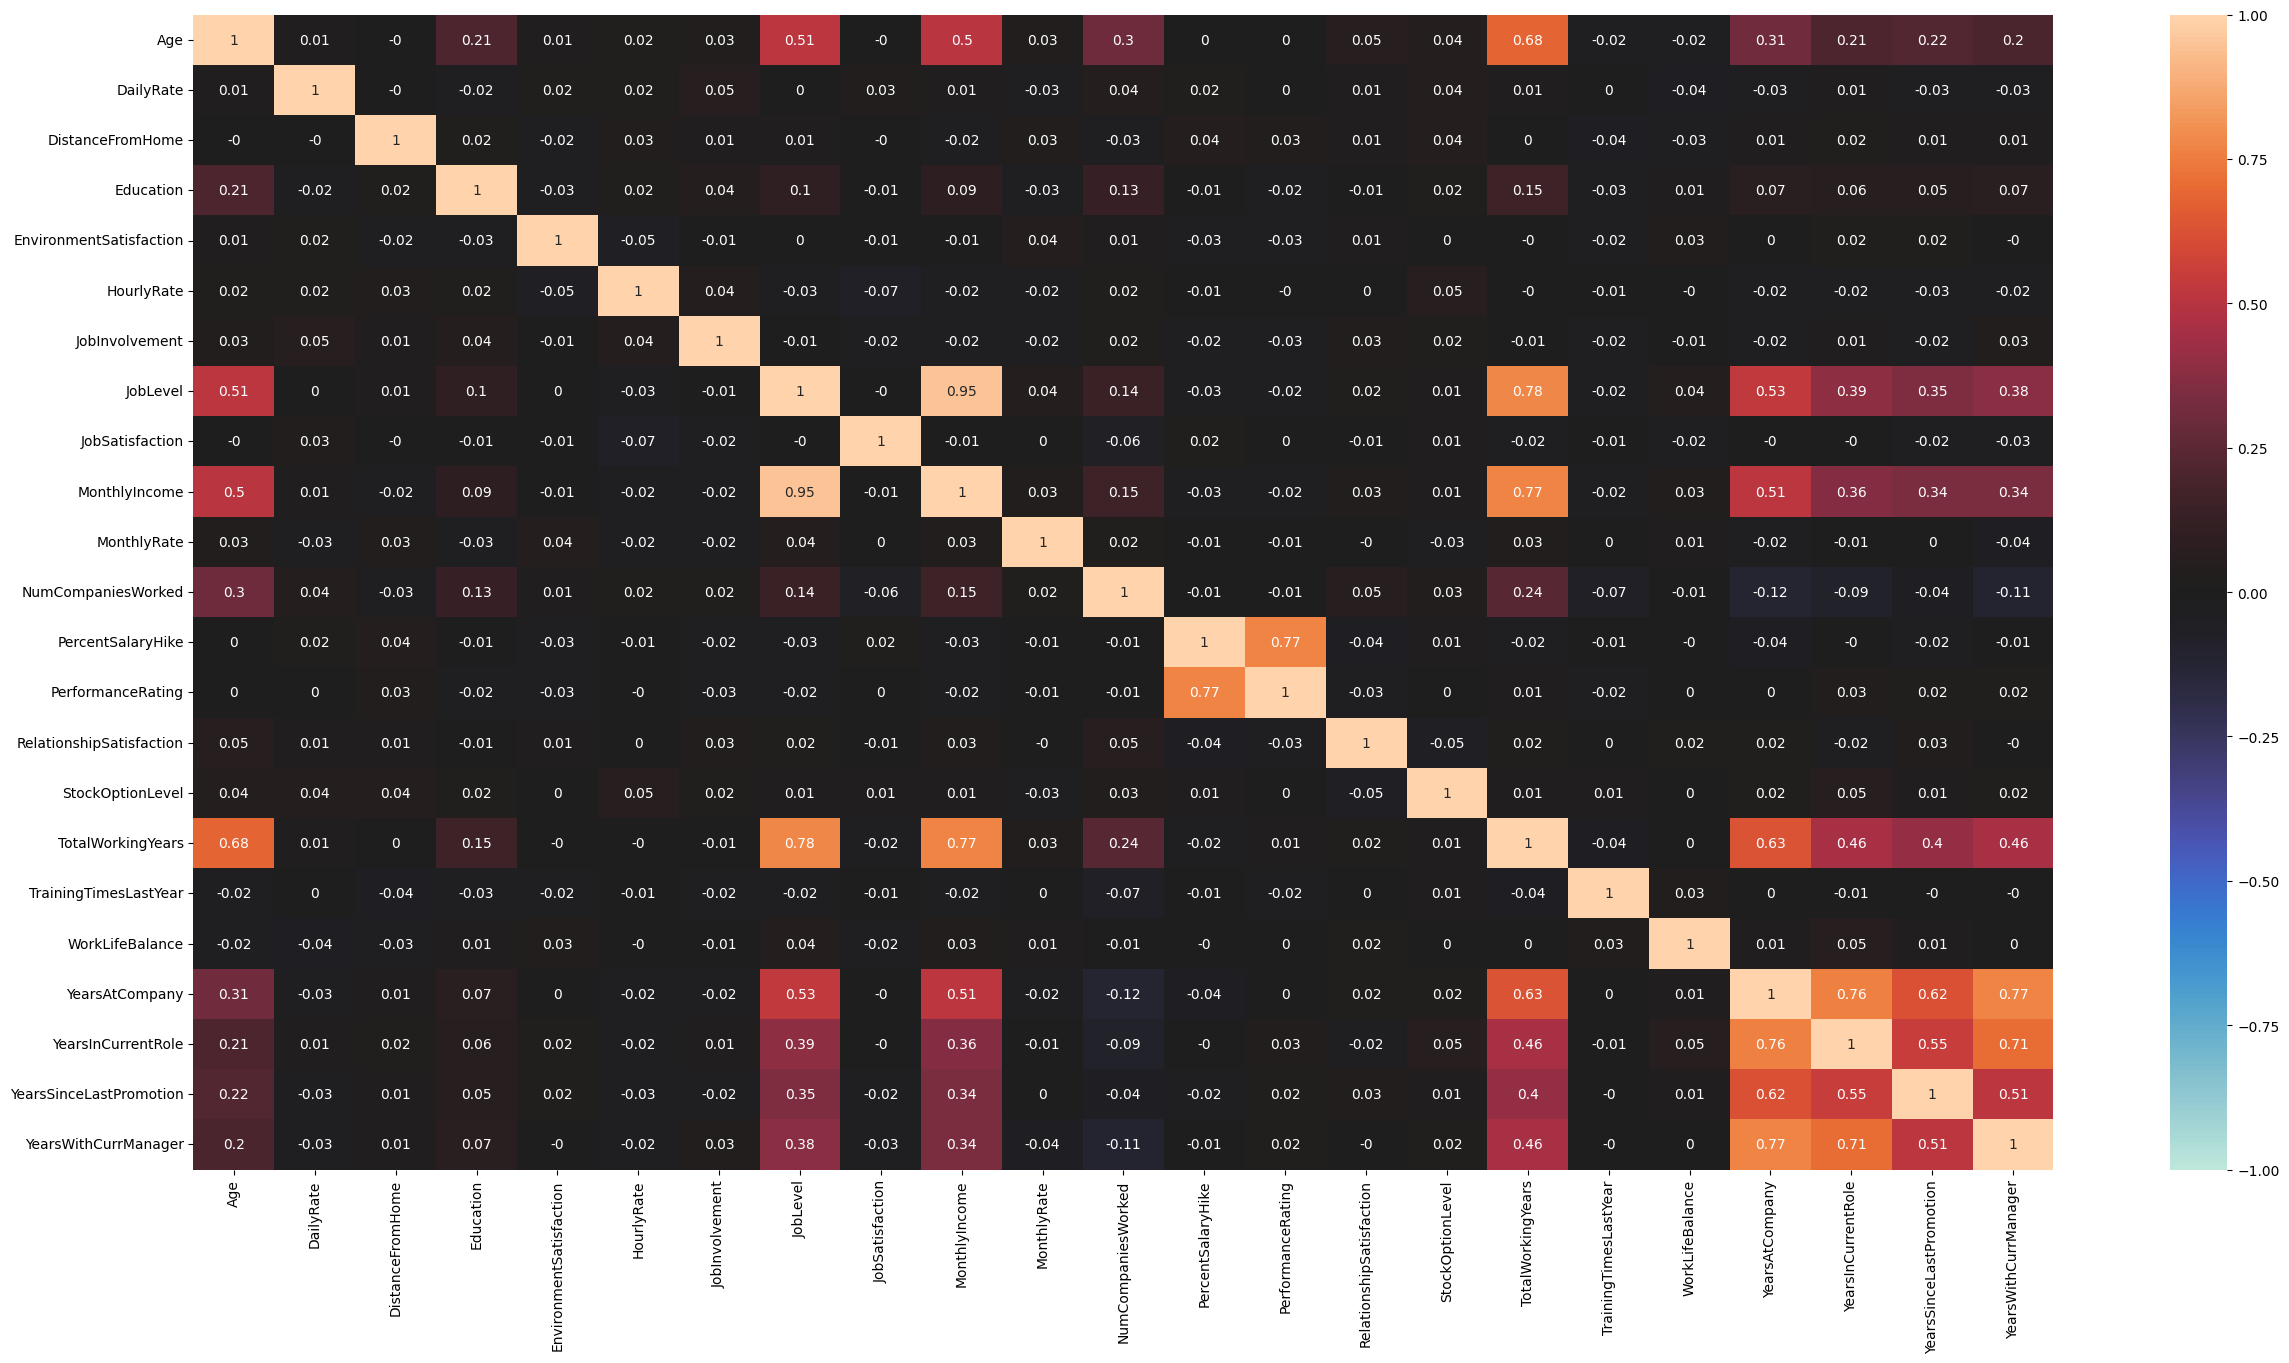

In [ ]:
fig = plt.figure(figsize=(30,15))
corr = datos.corr()
sns.heatmap(round(corr,2), vmin=-1, center=0, vmax=1, annot=True);
plt.savefig('temp.pdf', dpi=fig.dpi)

[texto del enlace](https://)Podríamos considerar tratar las varibales de YearsAtCompany, YearsWithCurrentCrole.. ya que podemos observar que tienen una cierta correlación directa.

In [ ]:
threshold=0.7
cols=list(corr.columns)
cols_at_index=list(corr.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(corr)):
        if corr[cols[i]][j]>=threshold and corr[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(corr[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

feature1              feature2  correlation
0            JobLevel         MonthlyIncome     0.950300
1            JobLevel     TotalWorkingYears     0.782208
2       MonthlyIncome     TotalWorkingYears     0.772893
3   PercentSalaryHike     PerformanceRating     0.773550
4      YearsAtCompany    YearsInCurrentRole     0.758754
5      YearsAtCompany  YearsWithCurrManager     0.769212
6  YearsInCurrentRole  YearsWithCurrManager     0.714365

TotalWorkingYears, JobLevel and MonthlyIncome: Tienen un valor de correlación muy alto. Opte por mantener MonthlyIncome.

PercentSalaryHike and PerformanceRating: Tienen un valor de correlación de 0,77. Opte por mantener PerformanceRating.

YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager: Tienen un valor de correlación alto. Decida mantener YearsAtCompany.



In [ ]:
datos.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager'],axis=1,inplace=True)

In [ ]:
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement                    JobRole  \
0     Female          94               3            Sales Executive   
1       Male          61               2         Research Scientist   
2       Male          92               2      Laboratory Technician   
3     Female          56               3         Research Scientist   
4       Male          40               3      Laboratory Technician   
...      ...         ...             ...                        ...   
1465    Male          41               4      Laboratory Technician   
1466    Male          42               2  Healthcare Representative   
1467    Male          87               4     Manufacturing Director   
1468    Male          63               2            Sales Executive   
1469    Male          82               4      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PerformanceRating  \
0                      8      Yes                  3   
1                      1       No                  4   
2                      6      Yes                  3   
3                      1      Yes                  3   
4                      9       No                  3   
...                  ...      ...                ...   
1465                   4       No                  3   
1466                   4       No                 

In [ ]:
cat_vars = [var for var in datos.columns if datos[var].dtype == 'O']

datos['Attrition'] = datos['Attrition'].replace({'No': 0, 'Yes': 1})
datos['Gender'] = datos['Gender'].replace({'Female': 0, 'Male': 1})
datos['OverTime'] = datos['OverTime'].replace({'No': 0, 'Yes': 1})

cat_vars_dummy = [var for var in datos.columns if datos[var].dtype == 'O']

num_vars = [var for var in datos.columns if var not in cat_vars ]

scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos[num_vars])
datos[num_vars] = datos_scaled


# Seleccionamos solo las columnas categóricas que nos interesan
#datos = pd.get_dummies(datos, columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
         #                              'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Department', 
          #                             'EducationField', 'JobRole', 'MaritalStatus','BusinessTravel'])

datos = pd.get_dummies(datos, columns= cat_vars_dummy)


# Mostramos el resultado
datos

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0     0.446350          1   0.742527         -1.010909  -0.891688   
1     1.322365          0  -1.297775         -0.147150  -1.868426   
2     0.008343          1   1.414363         -0.887515  -0.891688   
3    -0.429664          0   1.461466         -0.764121   1.061787   
4    -1.086676          0  -0.524295         -0.887515  -1.868426   
...        ...        ...        ...               ...        ...   
1465 -0.101159          0   0.202082          1.703764  -0.891688   
1466  0.227347          0  -0.469754         -0.393938  -1.868426   
1467 -1.086676          0  -1.605183         -0.640727   0.085049   
1468  1.322365          0   0.546677         -0.887515   0.085049   
1469 -0.320163          0  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0                   -0.660531       0    1.383138        0.379672   
1                    0.254625       1   -0.240677       -1.026167   
2                    1.169781       1    1.284725       -1.026167   
3                    1.169781       0   -0.486709        0.379672   
4                   -1.575686       1   -1.274014        0.379672   
...                       ...     ...         ...             ...   
1465                 0.254625       1   -1.224807        1.785511   
1466                 1.169781       1   -1.175601       -1.026167   
1467                -0.660531       1    1.038693        1.785511   
1468                 1.169781       1   -0.142264       -1.026167   
1469                -0.660531       1    0.792660        1.785511   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0            1.153254      -0.108350     0.726020            2.125136   
1           -0.660853      -0.291719     1.488876           -0.678049   
2            0.246200      -0.937654    -1.674841            1.324226   
3            0.246200      -0.763634     1.243211           -0.678049   
4           -0.660853      -0.644858     0.325900            2.525591   
...               ...            ...          ...                 ...   
1465         1.153254      -0.835451    -0.284329            0.523316   
1466        -1.567907       0.741140     1.004010            0.523316   
1467        -0.660853      -0.076690    -1.284418           -0.678049   
1468        -0.660853      -0.236474    -0.150393           -0.277594   
1469         0.246200      -0.445978    -0.574124           -0.277594   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0            1          -0.426230                 -1.584178         -0.932014   
1            0           2.346151                  1.191438          0.241988   
2            1          -0.426230                 -0.658973         -0.932014   
3            1          -0.426230                  0.266233         -0.932014   
4            0          -0.426230                  1.191438          0.241988   
...        ...                ...                       ...               ...   
1465         0          -0.426230                  0.266233          0.241988   
1466         0          -0.426230                 -1.584178          0.241988   
1467         1           2.346151                 -0.658973          0.241988   
1468         0          -0.426230                  1.191438         -0.932014   
1469         0          -0.426230                 -1.584178         -0.932014   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.171982        -2.493820       -0.164613   
1                  0.155707         0.338096        0.488508   
2                  0.155707         0.338096       -1.144294   
3                  0.155707         0.338096        0.161947   
4                  0.155707         0.338096       -0.817734   
...                     ...              ...             ...   
1465               0.155707         0.338096       -0.3

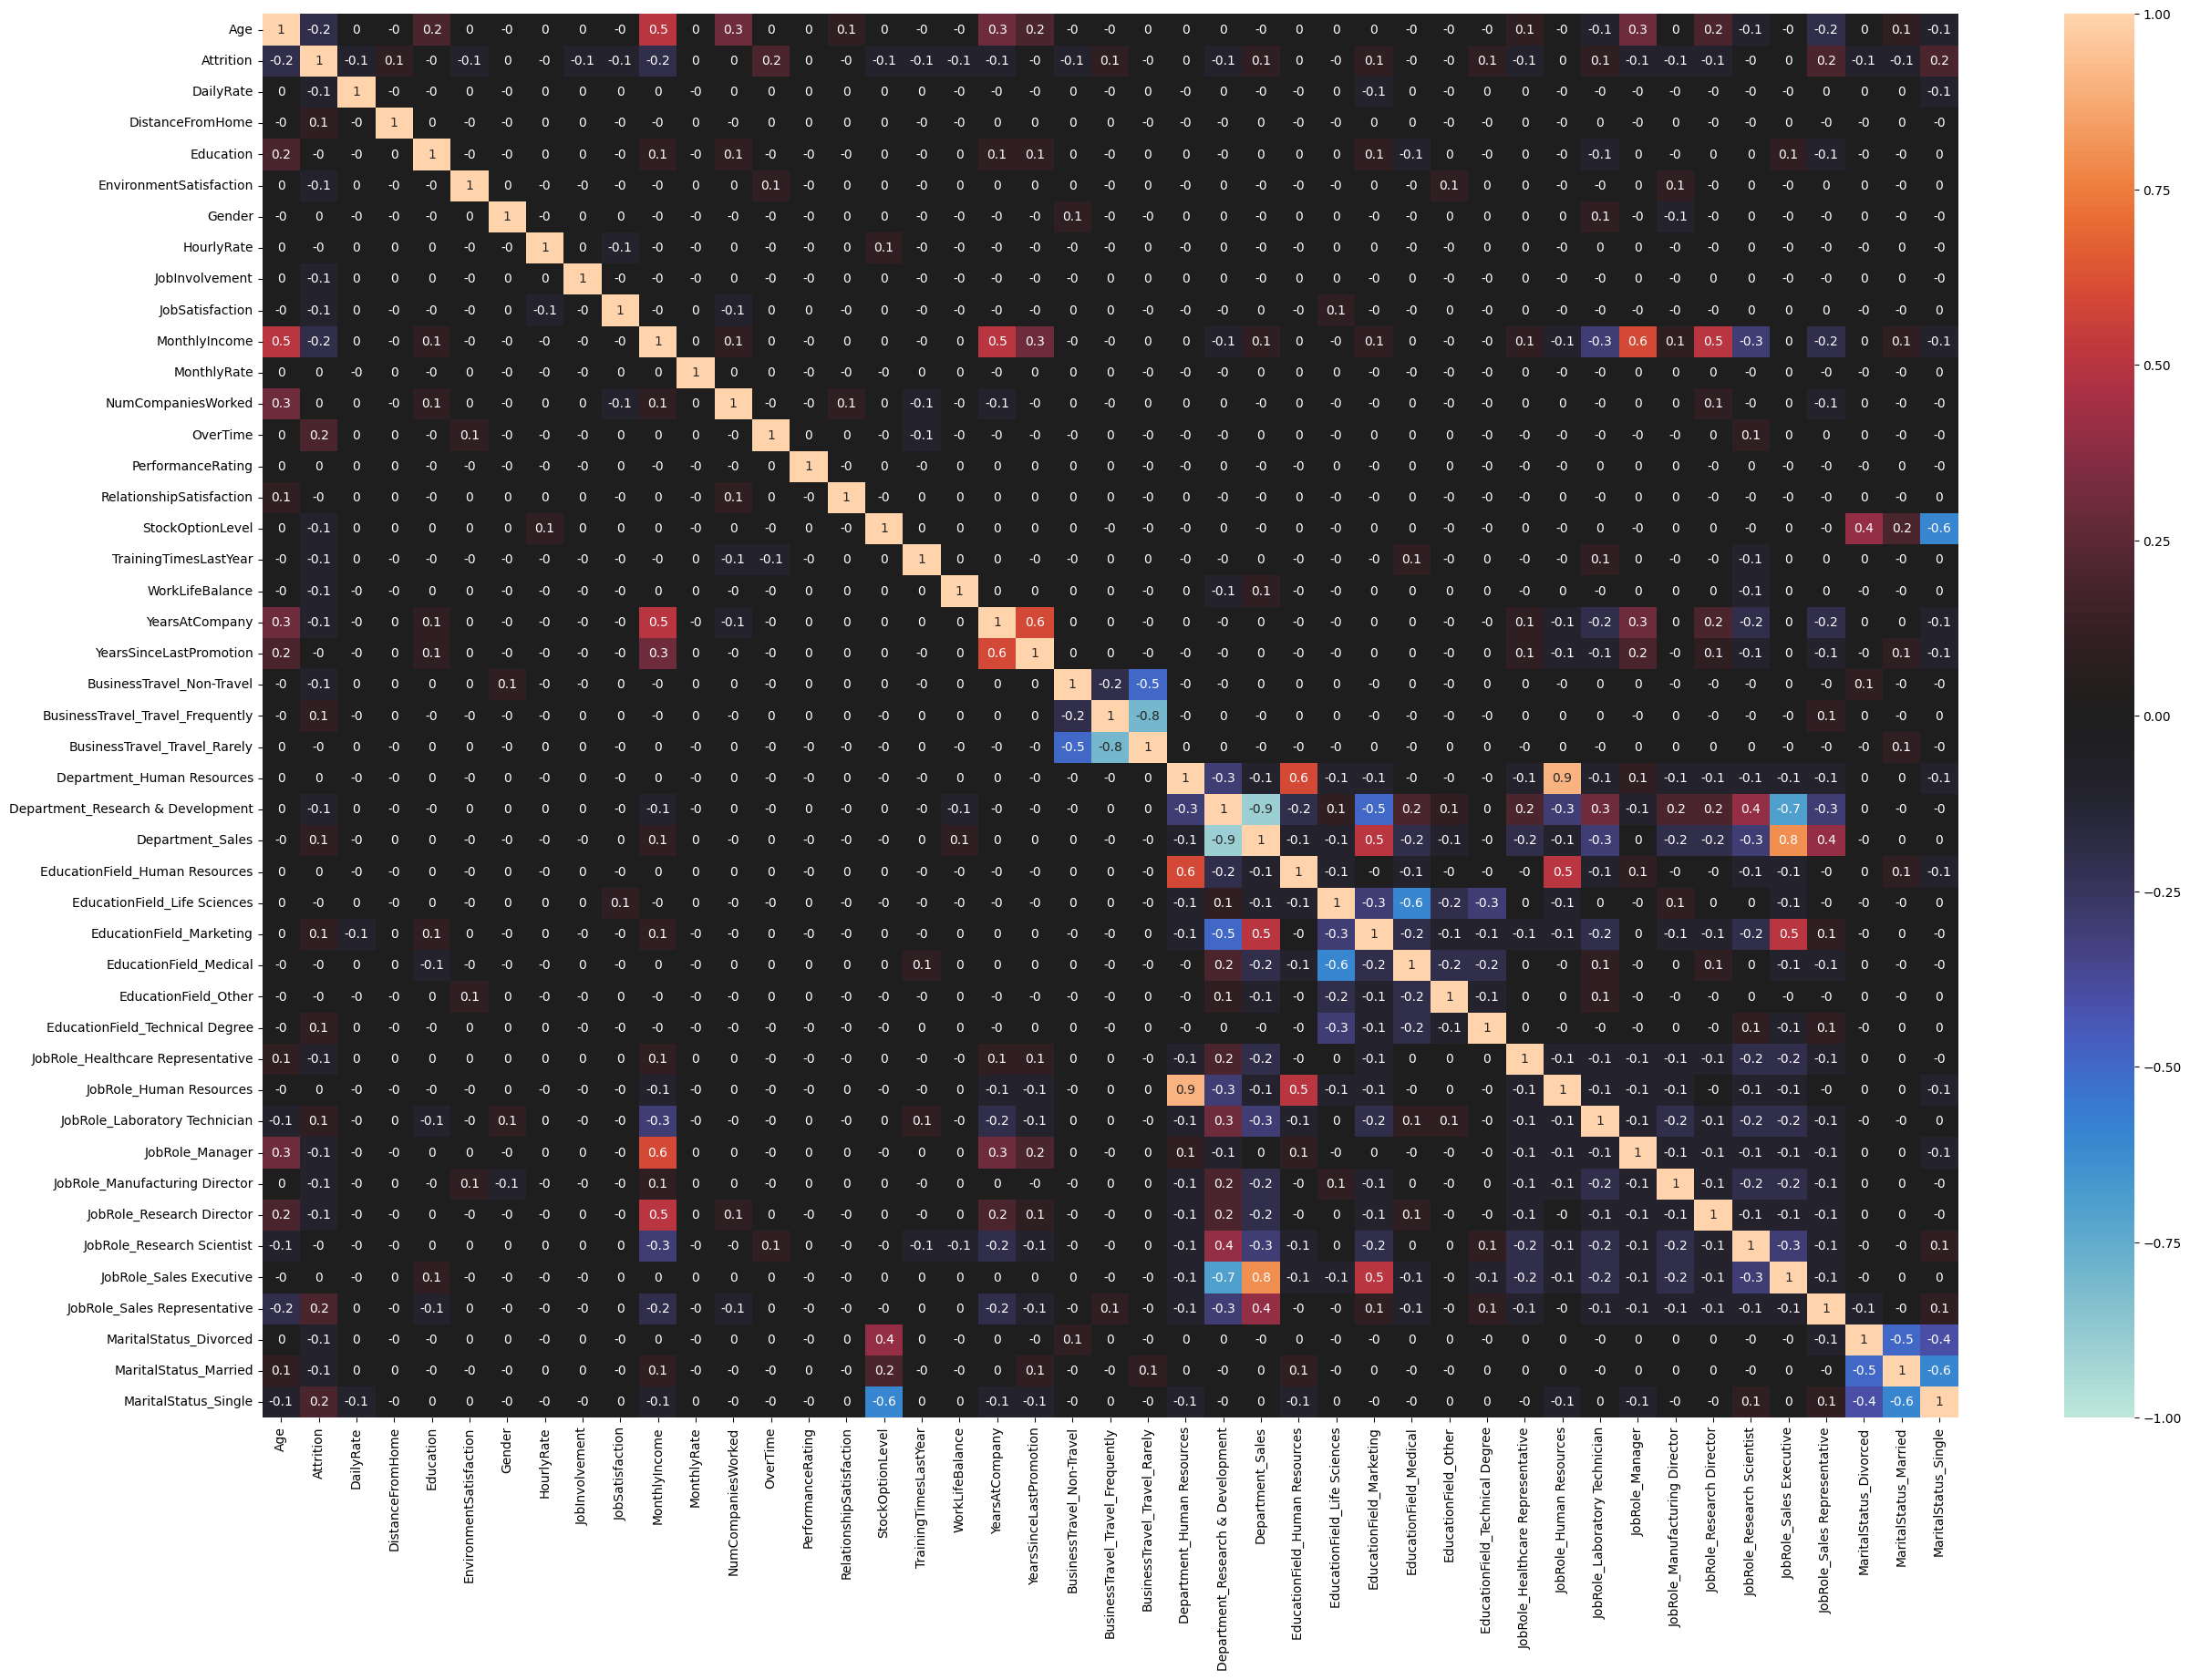

In [ ]:
fig = plt.figure(figsize=(30,20))
corr = datos.corr()
sns.heatmap(round(corr,1), vmin=-1, center=0, vmax=1, annot=True);

In [ ]:
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

In [ ]:
X

Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527         -1.010909  -0.891688   
1     1.322365  -1.297775         -0.147150  -1.868426   
2     0.008343   1.414363         -0.887515  -0.891688   
3    -0.429664   1.461466         -0.764121   1.061787   
4    -1.086676  -0.524295         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159   0.202082          1.703764  -0.891688   
1466  0.227347  -0.469754         -0.393938  -1.868426   
1467 -1.086676  -1.605183         -0.640727   0.085049   
1468  1.322365   0.546677         -0.887515   0.085049   
1469 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0                   -0.660531       0    1.383138        0.379672   
1                    0.254625       1   -0.240677       -1.026167   
2                    1.169781       1    1.284725       -1.026167   
3                    1.169781       0   -0.486709        0.379672   
4                   -1.575686       1   -1.274014        0.379672   
...                       ...     ...         ...             ...   
1465                 0.254625       1   -1.224807        1.785511   
1466                 1.169781       1   -1.175601       -1.026167   
1467                -0.660531       1    1.038693        1.785511   
1468                 1.169781       1   -0.142264       -1.026167   
1469                -0.660531       1    0.792660        1.785511   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0            1.153254      -0.108350     0.726020            2.125136   
1           -0.660853      -0.291719     1.488876           -0.678049   
2            0.246200      -0.937654    -1.674841            1.324226   
3            0.246200      -0.763634     1.243211           -0.678049   
4           -0.660853      -0.644858     0.325900            2.525591   
...               ...            ...          ...                 ...   
1465         1.153254      -0.835451    -0.284329            0.523316   
1466        -1.567907       0.741140     1.004010            0.523316   
1467        -0.660853      -0.076690    -1.284418           -0.678049   
1468        -0.660853      -0.236474    -0.150393           -0.277594   
1469         0.246200      -0.445978    -0.574124           -0.277594   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0            1          -0.426230                 -1.584178         -0.932014   
1            0           2.346151                  1.191438          0.241988   
2            1          -0.426230                 -0.658973         -0.932014   
3            1          -0.426230                  0.266233         -0.932014   
4            0          -0.426230                  1.191438          0.241988   
...        ...                ...                       ...               ...   
1465         0          -0.426230                  0.266233          0.241988   
1466         0          -0.426230                 -1.584178          0.241988   
1467         1           2.346151                 -0.658973          0.241988   
1468         0          -0.426230                  1.191438         -0.932014   
1469         0          -0.426230                 -1.584178         -0.932014   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.171982        -2.493820       -0.164613   
1                  0.155707         0.338096        0.488508   
2                  0.155707         0.338096       -1.144294   
3                  0.155707         0.338096        0.161947   
4                  0.155707         0.338096       -0.817734   
...                     ...              ...             ...   
1465               0.155707         0.338096       -0.327893   
1466               1.707500         0.338096       -0.001333   
1467              -2.171982         0.338096       -0.16461

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
#X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

#sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
#sns.set_context("poster",font_scale = .7)
#plt.subplots(figsize=(20,6))
#sns.countplot(x=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

Age  DailyRate  DistanceFromHome  Education  \
1097 -1.415181  -1.121758          1.456975  -0.891688   
727  -2.072192  -1.277942         -0.517332  -0.891688   
254  -0.867672   1.101996          1.333581  -0.891688   
1175  0.227347  -0.769726          0.346427   0.085049   
1341 -0.648668  -1.218443          1.333581   0.085049   
...        ...        ...               ...        ...   
1130 -0.210661  -0.130117          2.320735   0.085049   
1294  0.446350  -0.881285         -0.517332   0.085049   
860  -1.634185   1.124308         -0.764121   1.061787   
1459 -0.867672   1.426759          0.469821  -0.891688   
1126  1.431867  -1.334961         -0.023755   0.085049   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
1097                 0.254625       1   -0.437503       -1.026167   
727                 -0.660531       1    0.349801        0.379672   
254                  1.169781       1   -1.027981        0.379672   
1175                 1.169781       1    0.005356        0.379672   
1341                -0.660531       1    1.137106        0.379672   
...                       ...     ...         ...             ...   
1130                -0.660531       1   -0.978775        1.785511   
1294                -0.660531       1    0.940280        1.785511   
860                  0.254625       1   -0.880361       -1.026167   
1459                 1.169781       1   -0.978775       -1.026167   
1126                 0.254625       1   -0.339090        0.379672   

      JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
1097        -1.567907      -0.893883    -0.601108           -1.078504   
727          1.153254      -1.158419    -0.115258           -0.678049   
254          1.153254       0.090955    -0.503292           -0.277594   
1175        -0.660853      -0.256660    -0.930396            0.523316   
1341         0.246200      -0.489961     0.605857           -0.678049   
...               ...            ...          ...                 ...   
1130         0.246200      -0.657819     1.550855           -0.678049   
1294        -0.660853       0.077994     0.171024            0.122861   
860          1.153254      -0.775532    -1.418073           -1.078504   
1459        -0.660853      -0.526508     1.316292            0.523316   
1126         0.246200       2.725691     0.731642            0.523316   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
1097         0          -0.426230                 -0.658973          2.589994   
727          0          -0.426230                  1.191438         -0.932014   
254          0          -0.426230                  1.191438          0.241988   
1175         0           2.346151                  0.266233         -0.932014   
1341         0          -0.426230                 -1.584178          0.241988   
...        ...                ...                       ...               ...   
1130         0          -0.426230                  1.191438          1.415991   
1294         0          -0.426230                 -1.584178         -0.932014   
860          1          -0.426230                 -0.658973          0.241988   
1459         1          -0.426230                 -1.584178          0.241988   
1126         1          -0.426230                  0.266233          0.241988   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1097               0.155707         0.338096       -0.981014   
727               -0.620189         0.338096       -1.144294   
254               -0.620189         0.338096       -0.654454   
1175               0.155707         0.338096       -0.327893   
1341              -0.620189         0.338096        0.488508   
...                     ...              ...             ...   
1130               0.155707        -1.077862        0.488508   
1294               0.155707        -2.493820       -0.654454   
860                1.707500         0.338096       -1.14429

In [ ]:
# Creamos una instancia de RandomUnderSampler
rus = RandomUnderSampler()

# Submuestreamos los datos de entrenamiento
X_underResampled, y_underResampled = rus.fit_resample(X_train, y_train)

counter = Counter(y_underResampled)
print(counter)

Counter({0: 198, 1: 198})


In [ ]:
# Creamos una instancia de RandomUnderSampler
ros = RandomOverSampler()

# Sobremuestreamos los datos de entrenamiento
X_overResampled, y_overResampled = ros.fit_resample(X_train, y_train)
X_overResampled.shape
y_overResampled.shape

counter = Counter(y_overResampled)
print(counter)

Counter({0: 978, 1: 978})


https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(clf, param_grid, cv=cv)

grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.8764329518566808


              precision    recall  f1-score   support

           0       0.99      0.90      0.94       280
           1       0.28      0.79      0.42        14

    accuracy                           0.89       294
   macro avg       0.64      0.84      0.68       294
weighted avg       0.95      0.89      0.92       294

[[252   3]
 [ 28  11]]


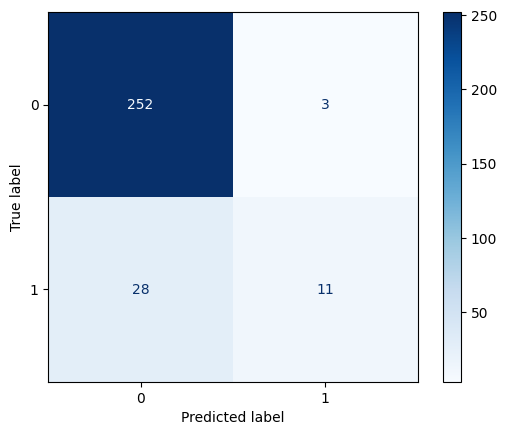

In [ ]:
#X_train,y_train=SMOTE(sampling_strategy=0.5, random_state=0).fit_resample(X_train, y_train)

#solvers = list(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
#intercept =  [True, False]
#multi_classes = list(['auto', 'ovr', 'multinomial'])

#solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty = ['l2']
#c_values = [100, 10, 1.0, 0.1, 0.01]

clf = LogisticRegression(solver= 'liblinear',C=0.1,penalty='l2', class_weight={0:1,1:1},max_iter=10000)
#clf = LogisticRegression(penalty='l2', fit_intercept=True, multi_class= 'ovr', solver= 'sag', class_weight="balanced", C= 1.0)

clf.fit(X_train, y_train)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

disp = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,cmap=plt.cm.Blues)
print(disp.confusion_matrix)


coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)
plt.show()

In [ ]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(clf, param_grid, cv=cv)

grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)



Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.7917608581894297


              precision    recall  f1-score   support

           0       0.77      0.96      0.85       206
           1       0.77      0.34      0.47        88

    accuracy                           0.77       294
   macro avg       0.77      0.65      0.66       294
weighted avg       0.77      0.77      0.74       294

[[197  58]
 [  9  30]]


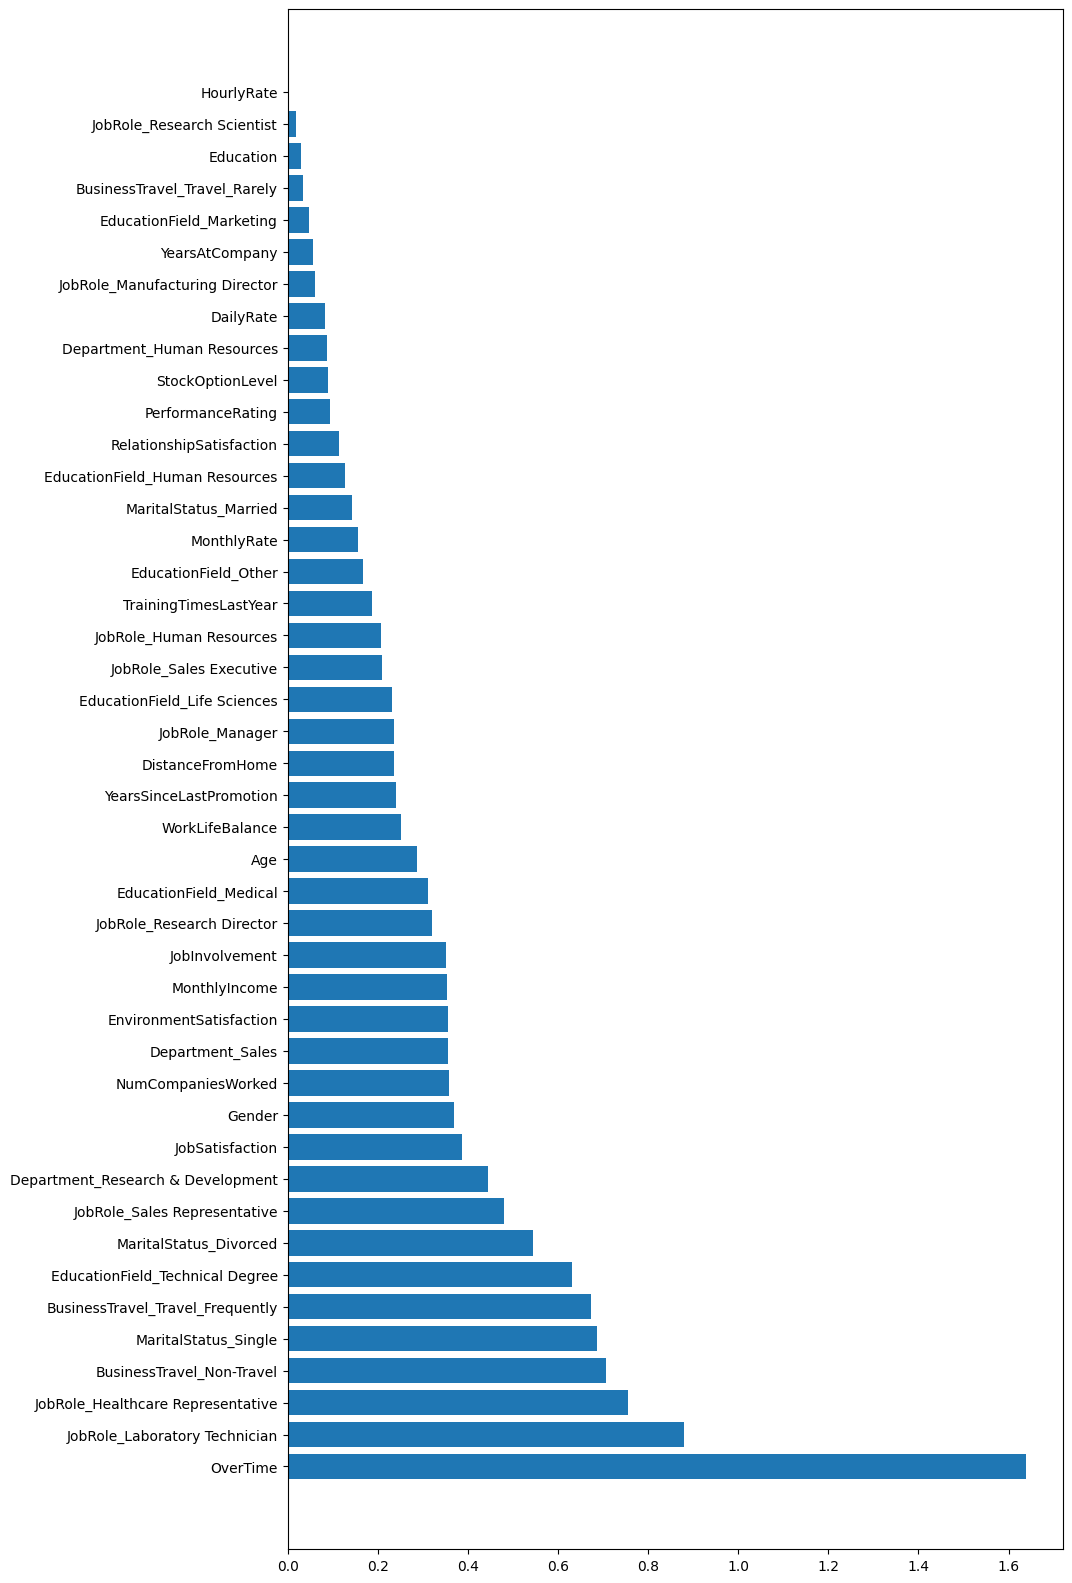

In [ ]:
clf = LogisticRegression(solver= 'newton-cg',C=0.1,penalty='l2', class_weight={0:1,1:1},max_iter=10000)
#clf = LogisticRegression(solver= 'newton-cg',C=0.1,penalty='l2')


clf.fit(X_overResampled, y_overResampled)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

disp = ConfusionMatrixDisplay.from_estimator(
clf,
X_test,
y_test,
cmap=plt.cm.Blues
)
print(disp.confusion_matrix)

coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)
plt.show()

In [ ]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(clf, param_grid, cv=cv)

grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.7481623931623934


              precision    recall  f1-score   support

           0       0.76      0.94      0.84       205
           1       0.69      0.30      0.42        89

    accuracy                           0.75       294
   macro avg       0.72      0.62      0.63       294
weighted avg       0.74      0.75      0.71       294



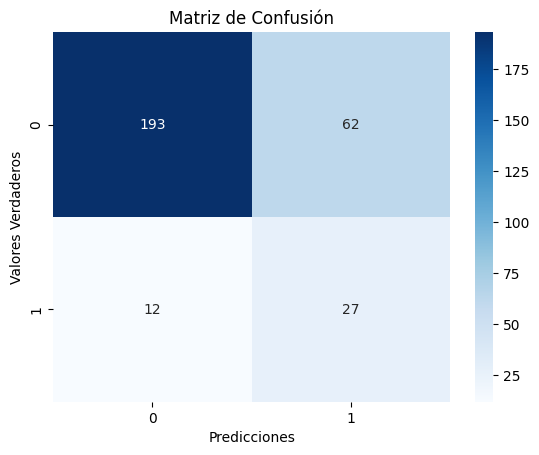

In [ ]:
clf = LogisticRegression(solver= 'lbfgs',C=0.1,penalty='l2',class_weight={0:1,1:1},max_iter=10000)

clf.fit(X_underResampled, y_underResampled)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

cm = confusion_matrix(y_test, clf_prd)

# graficar matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

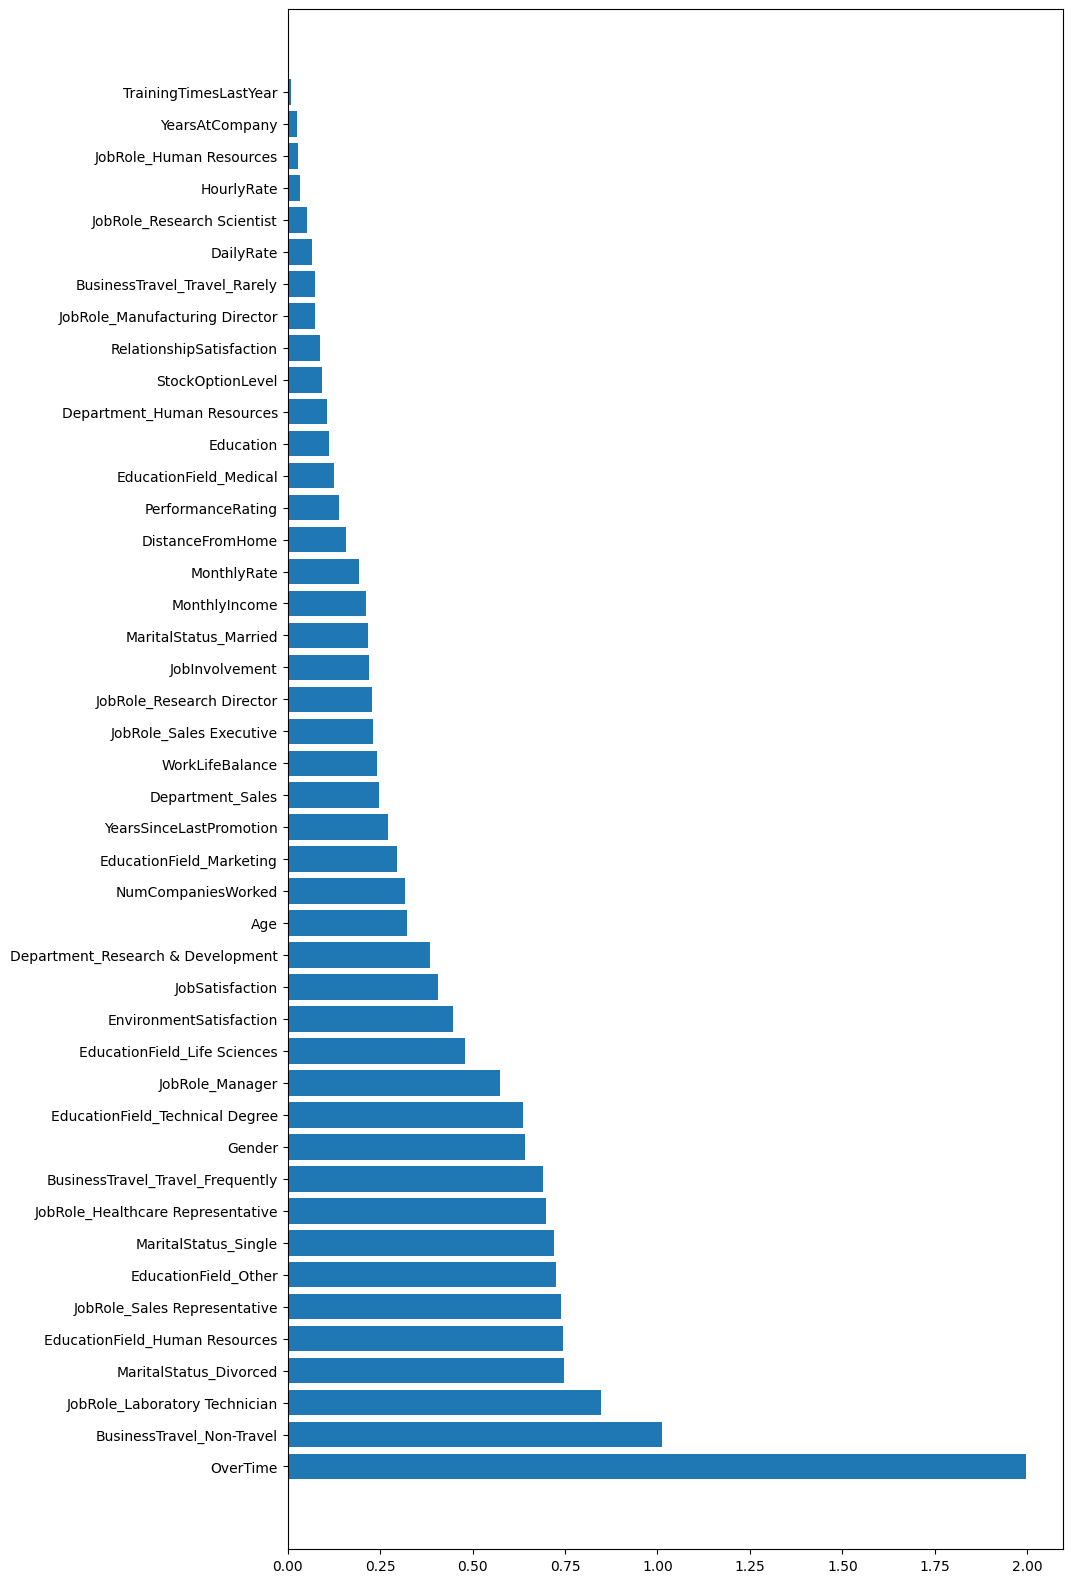

In [ ]:
coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])

#plt.bar(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)

#plt.xticks(range(len(coefs)), sorted_feature_names, rotation=90)
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 

dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=cv_method)

grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.8469419401370359


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=3,min_samples_leaf=20,min_samples_split=2) 

dtc.fit(X_train, y_train)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       292
           1       0.03      0.50      0.05         2

    accuracy                           0.87       294
   macro avg       0.51      0.68      0.49       294
weighted avg       0.99      0.87      0.92       294

                Variable  Importancia
12              OverTime     0.335515
9          MonthlyIncome     0.223882
18        YearsAtCompany     0.118273
0                    Age     0.101399
43  MaritalStatus_Single     0.097037


In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(dtc, feature_names=X.columns, max_depth=4, filled=True);

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=cv_method)

grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.9176866398733406


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=20,min_samples_leaf=1,min_samples_split=2) 

dtc.fit(X_overResampled, y_overResampled)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       244
           1       0.38      0.30      0.34        50

    accuracy                           0.80       294
   macro avg       0.62      0.60      0.61       294
weighted avg       0.78      0.80      0.79       294

          Variable  Importancia
12        OverTime     0.119288
9    MonthlyIncome     0.109210
18  YearsAtCompany     0.087162
1        DailyRate     0.084324
0              Age     0.078416


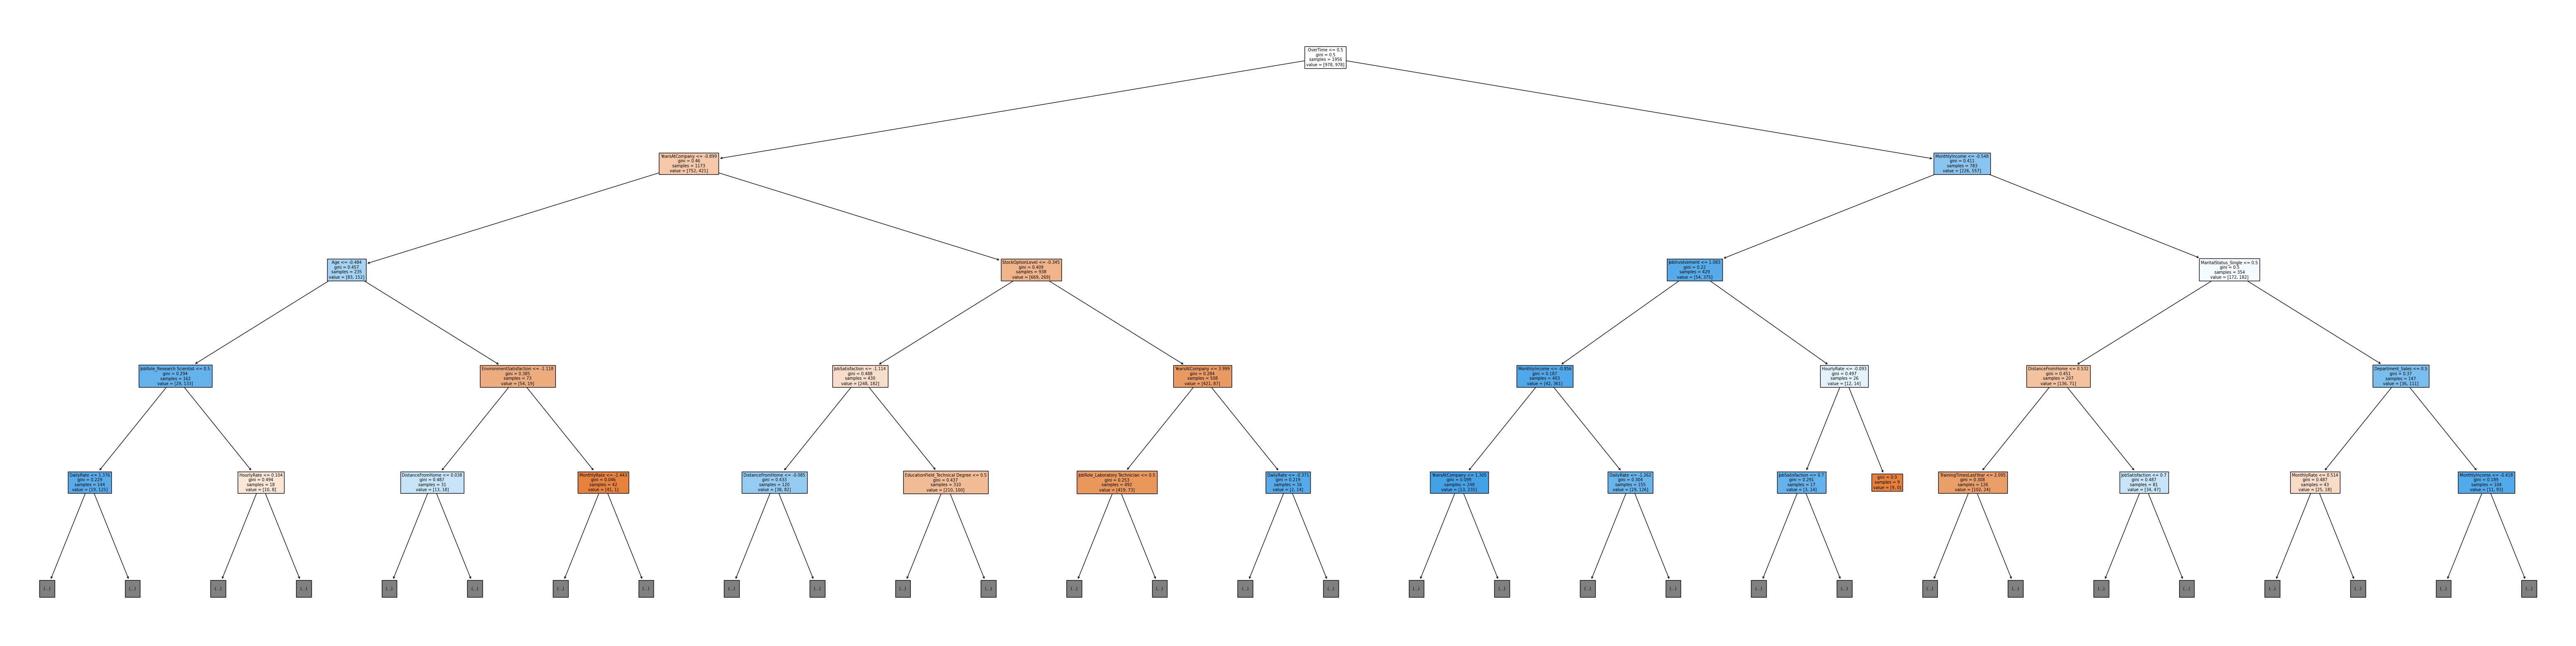

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(dtc, feature_names=X.columns, max_depth=4, filled=True);

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=cv_method)

grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)



Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.6910232067510548


In [ ]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=3,min_samples_leaf=20,min_samples_split=2) 

dtc.fit(X_underResampled, y_underResampled)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       227
           1       0.36      0.21      0.26        67

    accuracy                           0.73       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.69      0.73      0.71       294

                Variable  Importancia
12              OverTime     0.400917
18        YearsAtCompany     0.209175
9          MonthlyIncome     0.170013
43  MaritalStatus_Single     0.130636
15      StockOptionLevel     0.083329


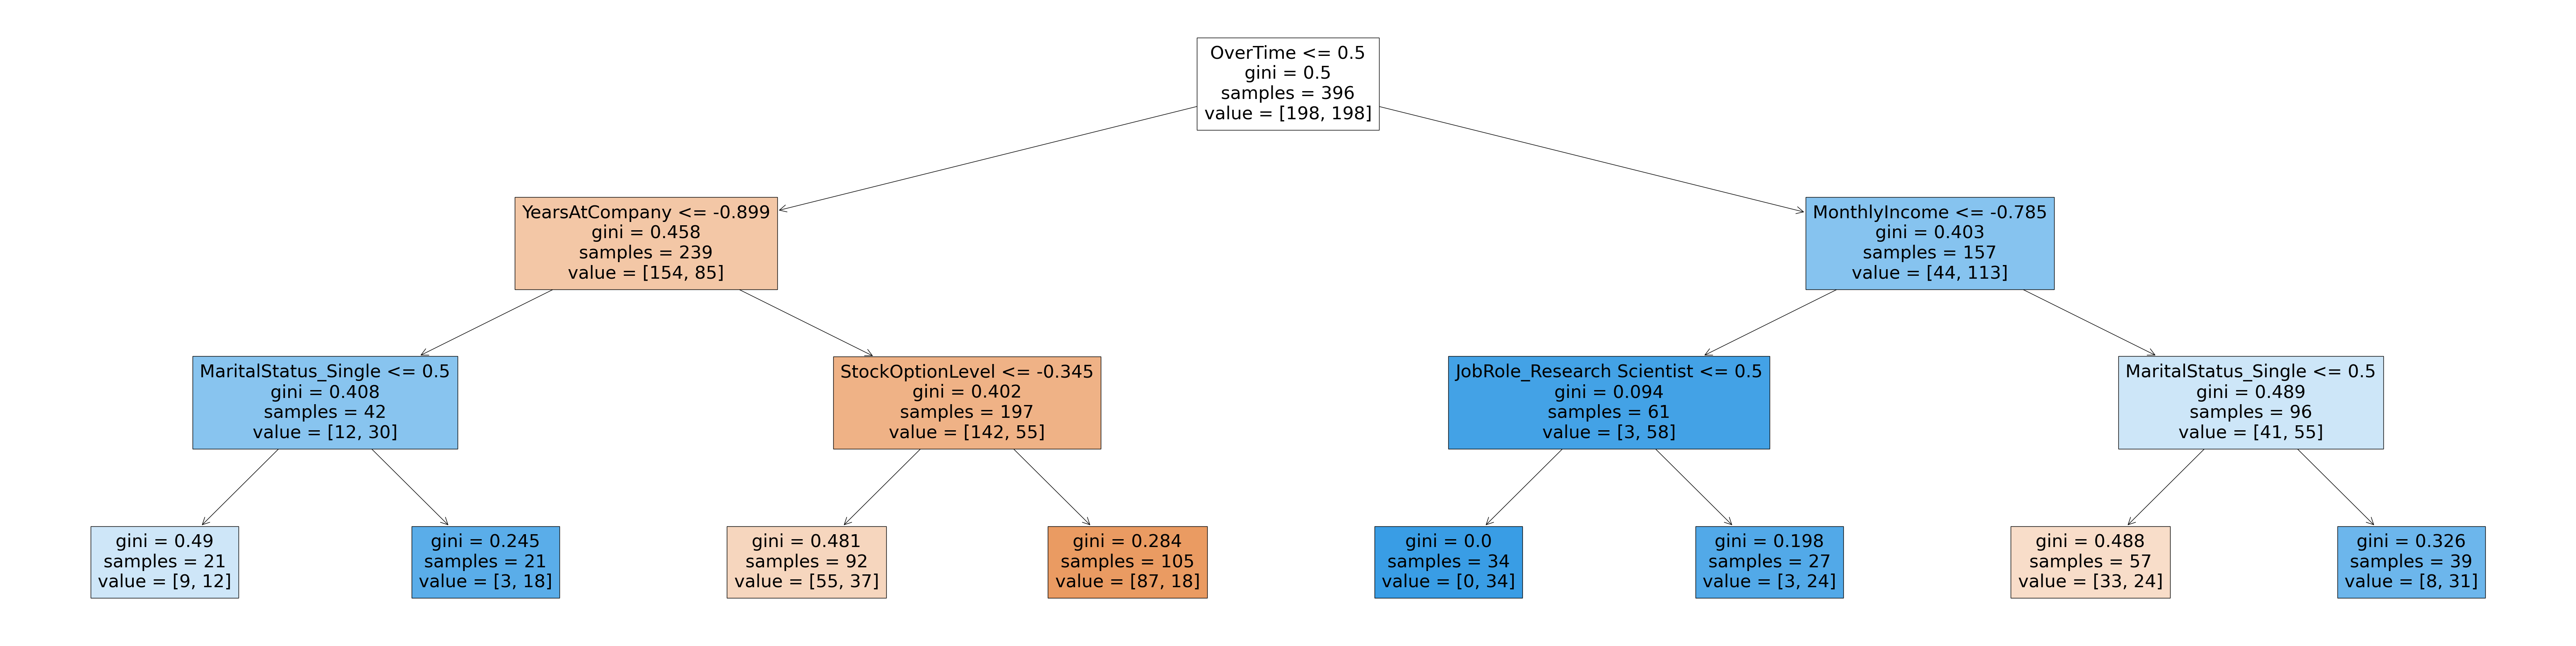

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(dtc, feature_names=X.columns, max_depth=4, filled=True);

In [ ]:
from sklearn.preprocessing import PowerTransformer

model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_train)

gs_NB.fit(Data_transformed, y_train);

print('Mejores hiperparámetros:', gs_NB.best_params_)
print('Puntuación de validación cruzada:', gs_NB.best_score_)

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Mejores hiperparámetros: {'var_smoothing': 1.0}
Puntuación de validación cruzada: 0.8284974155547542


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


gau = GaussianNB(var_smoothing=1)

Data_transformed = PowerTransformer().fit_transform(X_train)
gau.fit(Data_transformed,y_train)

Data_transformed = PowerTransformer().fit_transform(X_test)
gau_prd = gau.predict(Data_transformed)

print(classification_report(gau_prd, y_test))
sns.heatmap((metrics.confusion_matrix(y_test,gau_prd)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       260
           1       0.41      0.47      0.44        34

    accuracy                           0.86       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.87      0.86      0.86       294



In [ ]:
from sklearn.preprocessing import PowerTransformer

model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_overResampled)

gs_NB.fit(Data_transformed, y_overResampled);

print('Mejores hiperparámetros:', gs_NB.best_params_)
print('Puntuación de validación cruzada:', gs_NB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Mejores hiperparámetros: {'var_smoothing': 1.0}
Puntuación de validación cruzada: 0.7254614889434036


              precision    recall  f1-score   support

           0       0.48      0.93      0.63       131
           1       0.77      0.18      0.30       163

    accuracy                           0.52       294
   macro avg       0.62      0.56      0.46       294
weighted avg       0.64      0.52      0.45       294



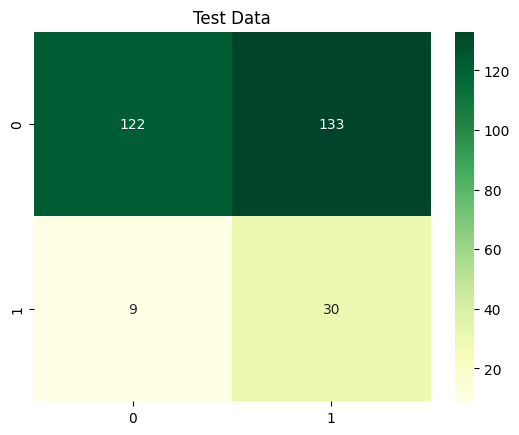

In [ ]:
from sklearn.naive_bayes import GaussianNB

gau = GaussianNB(var_smoothing=1)

Data_transformed = PowerTransformer().fit_transform(X_overResampled)
gau.fit(Data_transformed,y_overResampled)

Data_transformed = PowerTransformer().fit_transform(X_test)
gau_prd = gau.predict(Data_transformed)

print(classification_report(gau_prd, y_test))
sns.heatmap((metrics.confusion_matrix(y_test,gau_prd)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [ ]:
from sklearn.preprocessing import PowerTransformer

model = GaussianNB()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_underResampled)

gs_NB.fit(Data_transformed, y_underResampled);

print('Mejores hiperparámetros:', gs_NB.best_params_)
print('Puntuación de validación cruzada:', gs_NB.best_score_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Mejores hiperparámetros: {'var_smoothing': 1.0}
Puntuación de validación cruzada: 0.7036497890295358


              precision    recall  f1-score   support

           0       0.51      0.92      0.66       142
           1       0.72      0.18      0.29       152

    accuracy                           0.54       294
   macro avg       0.62      0.55      0.48       294
weighted avg       0.62      0.54      0.47       294



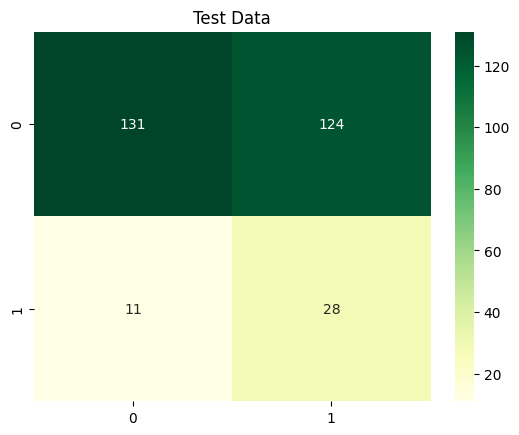

In [ ]:
from sklearn.naive_bayes import GaussianNB

gau = GaussianNB(var_smoothing=1)

Data_transformed = PowerTransformer().fit_transform(X_underResampled)
gau.fit(Data_transformed,y_underResampled)

Data_transformed = PowerTransformer().fit_transform(X_test)
gau_prd = gau.predict(Data_transformed)

print(classification_report(gau_prd, y_test))
sns.heatmap((metrics.confusion_matrix(y_test,gau_prd)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [ ]:
gau = GaussianNB()
gau.fit(X_underResampled,y_underResampled)
gau_prd = gau.predict(X_test)

print(classification_report(gau_prd, y_test))

              precision    recall  f1-score   support

           0       0.56      0.92      0.70       155
           1       0.69      0.19      0.30       139

    accuracy                           0.58       294
   macro avg       0.63      0.56      0.50       294
weighted avg       0.62      0.58      0.51       294



In [ ]:
gau = GaussianNB()
gau.fit(X_overResampled,y_overResampled)
gau_prd = gau.predict(X_test)

print(classification_report(gau_prd, y_test))

              precision    recall  f1-score   support

           0       0.54      0.93      0.68       148
           1       0.72      0.19      0.30       146

    accuracy                           0.56       294
   macro avg       0.63      0.56      0.49       294
weighted avg       0.63      0.56      0.49       294



In [ ]:
params = {
"subsample":[0.75, 1],
                "colsample_bytree":[0.75, 1],
                 "max_depth":[2, 6],
                 "min_child_weight":[1, 5],
                "learning_rate":[0.1, 0.01]}


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

gs2 = GridSearchCV(xgb.XGBClassifier(), params, cv=cv_method, scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)


Best score: 0.8359515524158383
Best score: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 1}


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       272
           1       0.31      0.55      0.39        22

    accuracy                           0.87       294
   macro avg       0.63      0.72      0.66       294
weighted avg       0.91      0.87      0.89       294



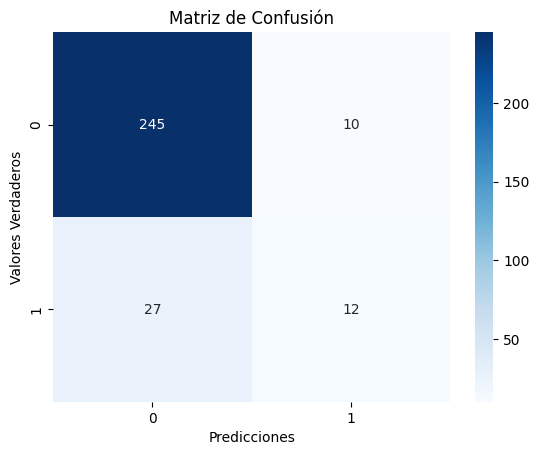

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print(classification_report(xgb_pred, y_test))

cm = confusion_matrix(y_test, xgb_pred)

# graficar matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_overResampled, y_overResampled)
xgb_pred = xgb_model.predict(X_test)

print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       265
           1       0.36      0.48      0.41        29

    accuracy                           0.86       294
   macro avg       0.65      0.69      0.67       294
weighted avg       0.88      0.86      0.87       294



In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_underResampled, y_underResampled)
xgb_pred = xgb_model.predict(X_test)

print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       209
           1       0.54      0.25      0.34        85

    accuracy                           0.72       294
   macro avg       0.64      0.58      0.58       294
weighted avg       0.69      0.72      0.68       294



In [ ]:
criteria = list(['gini','entropy'])
maxfeatures = list(['sqrt','log2','auto'])
bootstraps = list([True, False])

rfc = RandomForestClassifier(random_state=1)
param_grid = dict(criterion=criteria,max_features=maxfeatures,bootstrap=bootstraps)
grid = GridSearchCV(rfc, param_grid, cv = 5, n_jobs=-1)

grid.fit(X_train, y_train)
print('Mejores hiperparámetros:', grid.best_params_)


Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}


In [ ]:
rf = RandomForestClassifier(bootstrap=False, criterion = 'gini', max_features = 'sqrt',random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(classification_report(rf_pred, y_test))


              precision    recall  f1-score   support

           0       1.00      0.88      0.94       288
           1       0.13      0.83      0.22         6

    accuracy                           0.88       294
   macro avg       0.56      0.86      0.58       294
weighted avg       0.98      0.88      0.92       294



In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros:', grid_result.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)



Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Puntuación de validación cruzada: 0.8429788980636439


In [ ]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11, weights = "uniform")

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       290
           1       0.08      0.75      0.14         4

    accuracy                           0.87       294
   macro avg       0.54      0.81      0.54       294
weighted avg       0.98      0.87      0.92       294



In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_result.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Puntuación de validación cruzada: 0.6764743589743591


In [ ]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = "uniform")

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       293
           1       0.03      1.00      0.05         1

    accuracy                           0.87       294
   macro avg       0.51      0.94      0.49       294
weighted avg       1.00      0.87      0.93       294



In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_result.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)


Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Puntuación de validación cruzada: 0.9372867608581895


In [ ]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 1, weights = "uniform")

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       267
           1       0.28      0.41      0.33        27

    accuracy                           0.85       294
   macro avg       0.61      0.65      0.62       294
weighted avg       0.88      0.85      0.86       294



In [ ]:
svc = SVC(random_state=42) 
svc_param_grid = { 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Puntuación de validación cruzada: 0.948876507124589


In [ ]:
svc = SVC()

svc.fit(X_overResampled, y_overResampled)
svc_prd = svc.predict(X_test)

print(classification_report(svc_prd, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       254
           1       0.51      0.50      0.51        40

    accuracy                           0.87       294
   macro avg       0.72      0.71      0.71       294
weighted avg       0.87      0.87      0.87       294



# Definimos los modelos y los parámetros a evaluar con GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
dtc_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc = SVC(random_state=42)
svc_param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

rfr = RandomForestRegressor(random_state=42)
rfr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mlp = MLPClassifier(random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

xgb = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.75, 1.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

coefs = np.abs(mlp.coefs_[0]).sum(axis=1)
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.bar(range(len(coefs)), coefs[indices])
plt.xticks(range(len(coefs)), sorted_feature_names, rotation=90)
plt.show()

print("Red neuronal - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

Red neuronal - Importancia de las variables:
                             Variable  Importancia
32  JobRole_Healthcare Representative    12.366455
28           EducationField_Marketing    10.608355
20          BusinessTravel_Non-Travel    10.419673
23         Department_Human Resources    10.011754
37          JobRole_Research Director     9.706230


In [ ]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, clf_prd)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_prd)
pr_auc = auc(recall, precision)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precisión-Recall (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Entrenar y evaluar modelos
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Árbol de decisión - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": dt.feature_importances_}).sort_values("Importancia", ascending=False).head())

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Bosque aleatorio - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": rf.feature_importances_}).sort_values("Importancia", ascending=False).head())

from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(train, target_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(test)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = attrition_final.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=2000, width=1900)

svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)
print("SVM - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(svm.coef_[0])}).sort_values("Importancia", ascending=False).head())

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print("Red neuronal - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())


# Entrenar un modelo de XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15, 13)) # ajuste el tamaño de la figura aquí
xgb.plot_importance(xgb_model, ax=ax)


Árbol de decisión - Importancia de las variables:
         Variable  Importancia
9   MonthlyIncome     0.146148
1       DailyRate     0.090099
12       OverTime     0.078718
0             Age     0.073726
10    MonthlyRate     0.058774
Bosque aleatorio - Importancia de las variables:
          Variable  Importancia
9    MonthlyIncome     0.098863
0              Age     0.065063
18  YearsAtCompany     0.061954
12        OverTime     0.061750
1        DailyRate     0.059302


NameError: ignored